## Validation Projet Machine Learning

**Projet Machine Learning réalisé par :** 
*   Salma Belhadj Ali
*   Ala Chalghaf
*   Ramzi Berriri
*   Mariem Souissi
*   Islem Saoudi
*   Aya Cherni
*   Nader Abichou




<font color='pink'>Au cours de notre projet, nous allons travailler avec un Data set d’une banque taïwanaise qui traite les défauts de paiement en fonction de l’historique des 6 derniers mois allant de Septembre 2005 jusqu’à Avril 2005 ainsi que quelques données personnelles concernant le client.</font>

#### I. Business understanding
###### Expliquer les éléments métiers et problématiques à résoudre

<font color = pink>Problématique : </font>

Cette section présente la problématique de cette étude. Dans notre projet nous nous pencherons sur les clients potentiels qui peuvent subir un défaut de paiement.
Alors la question qui se pose est de savoir quels seraient les modèles les plus efficaces pour nous aider à prédire d’une façon plus précise ces clients ? Et Comment allons-nous procéder dans la préparation de la base de données afin qu’elle réponde aux attentes en limitant les erreurs ?

<font color='pink'>Objectif : </font>

Le business étudié concerne la hausse du nombre de clients de Taiwan à qui la banque libèrent un grand crédit sans arriver à payer leurs dettes, créant ainsi un manque de confiance à la distribution des crédits chez la banque et surtout un problème économique dans le pays. La crise a porté un coup dur au crédit à la consommation et surtout à la confiance de la banque envers ses clients. C'est pourquoi c'est un grand défi pour les banques de réussir à prédire les clients à qui elles peuvent faire confiance, en utilisant les informations financières et les enregistrements des transactions et des remboursements des clients, etc... pour prédire la performance de l'entreprise et le crédit des clients particuliers, donc, la réduction du risque et le dommage de l'incertitude.

C'est là où nous rentrons en jeu.
Notre équipe est demandé à créer un modèle capable d'aider la banque à mieux prédire les clients qui ont tendance à faire un déficit
Nous voulons minimiser au maximum les pertes que la banque pourrait subir à cause de ces clients. Pour cela nous allons, d'abord, étudier et visualiser nos données afin de bien les comprendre et mieux les utiliser par la suite.

#### II. Data understanding

###### Déterminer précisément les données à analyser, à identifier la qualité des données disponibles. 

In [ ]:
#Importer les bibliothèques :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [ ]:
#Importer le fichier de Dataset :
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.csv to default of credit card clients (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['default of credit card clients.csv']))
dataset

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
#Supprimer la ligne 0 :
df = dataset.drop([0], axis=0)
#Convertir les valeurs du Dataframe en entiers :
df = df.astype(int)
#Supprimer la colonne Unnamed: 0 :
df=df.drop(['Unnamed: 0'],axis=1)
#Afficher le Dataframe :
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<font color='pink'>Pour les mesures statistiques, on a examiné les données de notre Dataset où nous avons exploré les valeurs minimales, maximales, moyennes, quantiles et l'écart-type de chaque variable.</font>



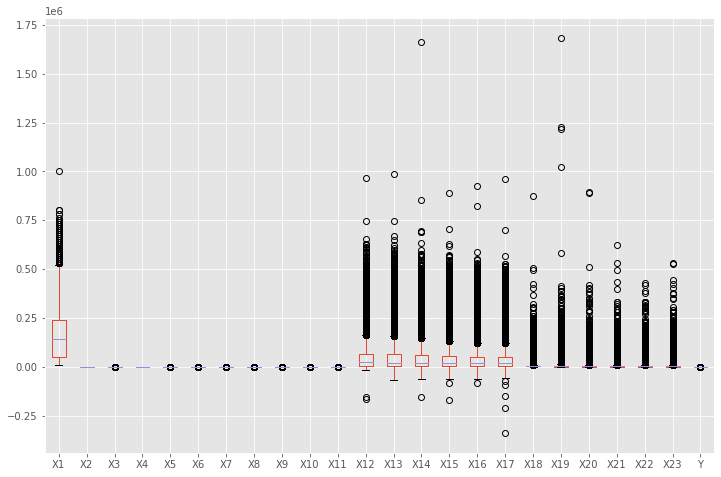

In [ ]:
#Représentation graphique des variables de df (Boxplot) :
df.boxplot()
plt.show()

In [ ]:
#Description des mesures statistiques de df :
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
X3,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
X4,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
X5,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
X6,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
X7,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
X8,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
X9,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
X10,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


<font color = pink> Tout d'abord, nous examinerons la distribution de la variable cible Y. Ensuite, nous passerons aux features, en examinant leurs distributions, leurs relations avec la cible et, dans certains cas, les relations entre certaines d'entre elles. </font>

In [ ]:
#Renommer nos variables :
df = df.rename(columns={'X1': 'LIMIT_BAL'})
df = df.rename(columns={'X2': 'SEX'})
df = df.rename(columns={'X3': 'EDUCATION'})
df = df.rename(columns={'X4': 'MARRIAGE'})
df = df.rename(columns={'X5': 'AGE'})
df = df.rename(columns={'X6': 'PAY_1'})
df = df.rename(columns={'X7': 'PAY_2'})
df = df.rename(columns={'X8': 'PAY_3'})
df = df.rename(columns={'X9': 'PAY_4'})
df = df.rename(columns={'X10': 'PAY_5'})
df = df.rename(columns={'X11': 'PAY_6'})
df = df.rename(columns={'X12': 'BILL_AMT1'})
df = df.rename(columns={'X13': 'BILL_AMT2'})
df = df.rename(columns={'X14': 'BILL_AMT3'})
df = df.rename(columns={'X15': 'BILL_AMT4'})
df = df.rename(columns={'X16': 'BILL_AMT5'})
df = df.rename(columns={'X17': 'BILL_AMT6'})
df = df.rename(columns={'X18': 'PAY_AMT1'})
df = df.rename(columns={'X19': 'PAY_AMT2'})
df = df.rename(columns={'X20': 'PAY_AMT3'})
df = df.rename(columns={'X21': 'PAY_AMT4'})
df = df.rename(columns={'X22': 'PAY_AMT5'})
df = df.rename(columns={'X23': 'PAY_AMT6'})
df = df.rename(columns={'Y': 'DEFAULT_PAY'})
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<font color = pink>En ce qui concerne la variable "Education", pour clarifier, les valeurs 0, 4, 5 et 6 sont réunis dans une même catégorie 4 "Autres". </font>

In [ ]:
#La définition des états 0, 4, 5 et 6 dans une même catégorie 4 :
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,4)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(5,4)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,4)

In [ ]:
#On a fait une copie de notre Dataset pour qu'on possède une propre copie d'index et de données :
df2=df.copy(deep=True)

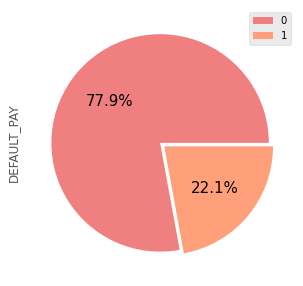

In [ ]:
#Affichage du pourcentage des clients avec un défaut de paiement. 
#Y prend deux valeurs binaires : 
#1 = « Yes ». 
#0 = « No ». 
plt.figure(figsize=(7,5))
df['DEFAULT_PAY'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['LIGHTCORAL','LIGHTSALMON'], explode = [0,0.05], textprops = {"fontsize":15})
plt.legend(labels=['0', '1'])
plt.show()

<font color = pink> 22,1% des clients ont un défaut de paiement. Donc, la minorité des clients sont déficitaires. </font>

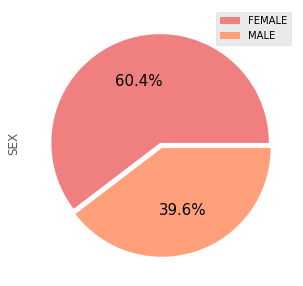

In [ ]:
#Présentation du pourcentage des clients qui ont un défaut de paiement selon leur sexe. 
#X2 peut prendre deux valeurs : 
#1 = « Male ». 
#2 = « Female ». 
plt.figure(figsize=(7,5))
df['SEX'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['LIGHTCORAL','LIGHTSALMON'], explode = [0,0.05], textprops = {"fontsize":15})
plt.legend(labels=['FEMALE', 'MALE'])
plt.show()

<font color = pink>On a remarqué qu’il y a plus de femmes que d’hommes dans notre Dataset. </font>

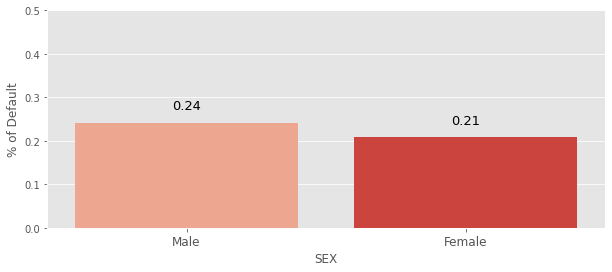

In [ ]:
#Présentation du pourcentage des clients qui ont un défaut de paiement selon leur sexe. 
plt.figure(figsize=(10,4))
ax = sns.barplot(x = "SEX", y = "DEFAULT_PAY", data = df, palette = 'Reds', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

<font color = pink> Les hommes ont un risque de défaut légèrement plus élevé que les femmes. Donc, la majorité des clients déficitaires sont des hommes.</font>

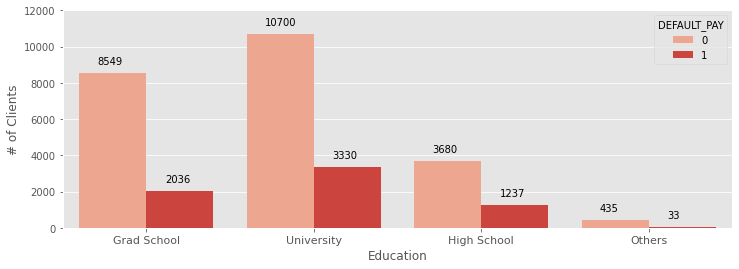

In [ ]:
#Décrit le nombre des clients qui ont un défaut de paiement par rapport à leur niveau éducatif X3. 
#X3 prend 7 valeurs : 
#1 = « Graduate School ». 
#2 = « University ». 
#3 = « High School ». 
#0, 4, 5 et 6 = « Others ».
#Remarque : Les états 0, 4, 5 et 6 sont réunis dans une même catégorie 4.
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'EDUCATION', hue="DEFAULT_PAY", palette = 'Reds')
plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

<font color = pink>Le niveau éducatif de clients déficitaires le plus prédominant dans notre Dataset est « University », suivi par « Graduate School », puis « High School » et « Others ». </font>

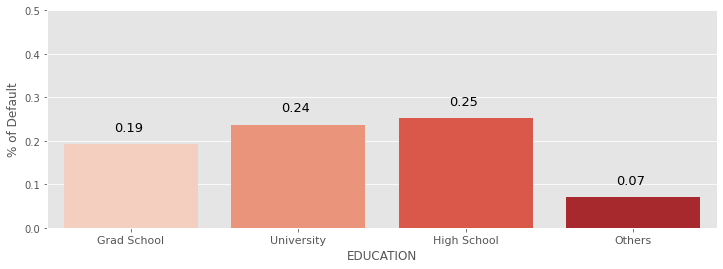

In [ ]:
#Décrit le pourcentage des clients qui ont un défaut de paiement par rapport à leur niveau éducatif X3. 
#X3 prend 7 valeurs : 
#Remarque : Les états 0, 4, 5 et 6 sont réunis dans une même catégorie 4.
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "EDUCATION", y = "DEFAULT_PAY", data = df, palette = 'Reds', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
plt.show()

<font color = pink> Si on considère seulement les 3 premiers niveaux, on peut constater que les clients avec niveau « Graduate School » admettent la moindre chance pour tomber sur un défaut de paiement. </font>

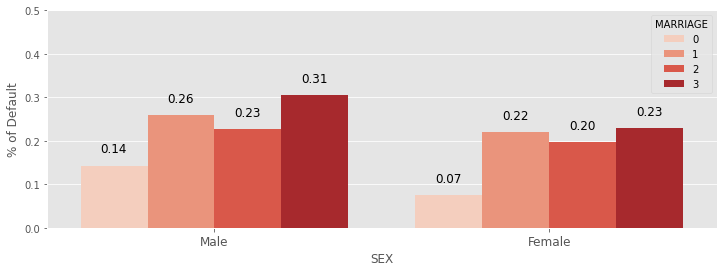

In [ ]:
#Explique le pourcentage des clients qui ont un défaut de paiement par rapport à leur situation maritale X4 et leur sexe X2. 
#X4 prend 4 valeurs : 
#1 = « Married ». 
#2 = « Single ». 
#3 = « Divorce ». 
#0 = « Others » . 
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "SEX", y = "DEFAULT_PAY", hue = "MARRIAGE", data = df, palette = 'Reds', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

<font color = pink> Pour les hommes, on a : 
14% des hommes avec une situation « Others » ont un défaut. 
26% des hommes mariés ont un défaut de paiement. 
23% des hommes célibataires ont un défaut de paiement. 
Et 31% des hommes divorcés ont un défaut de paiement. 
De même pour les femmes. 
Donc, les divorcés ont un risque plus élevé, par rapport aux autres catégories, d’avoir un défaut de paiement. </font>

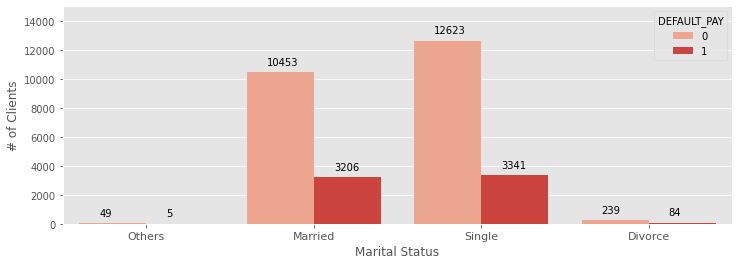

In [ ]:
#Décrit le nombre des clients qui ont un défaut de paiement par rapport à leur situation maritale X4. 
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'MARRIAGE', hue="DEFAULT_PAY", palette = 'Reds')
plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Others', 'Married', 'Single', 'Divorce'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))
plt.show()

<font color = pink>Comme il est indiqué, la plupart des clients déficitaires dans notre Dataset appartiennent à deux catégories « Mariés » et « Célibataires ». </font>

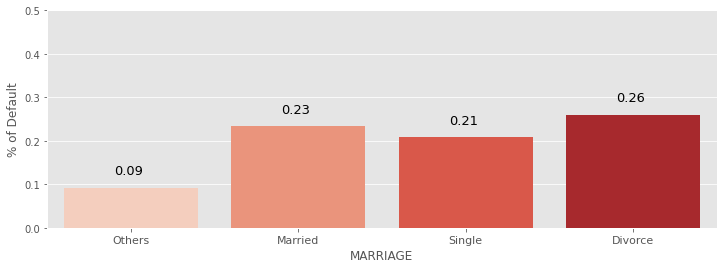

In [ ]:
#Décrit le pourcentage des clients qui ont un défaut de paiement par rapport à leur situation maritale X4.
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "MARRIAGE", y = "DEFAULT_PAY", data = df, palette = 'Reds', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Others', 'Married', 'Single', 'Divorce'], fontsize = 11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
plt.show()

<font color = pink>La catégorie « Others » présente la probabilité de défaut la plus faible, d'où on peut la négliger. 
Parmi les autres groupes, ceux qui sont célibataires ont un risque 
légèrement plus faible de défaut de paiement, tandis que les 
personnes divorcées sont les plus susceptibles d’avoir un défaut. </font>

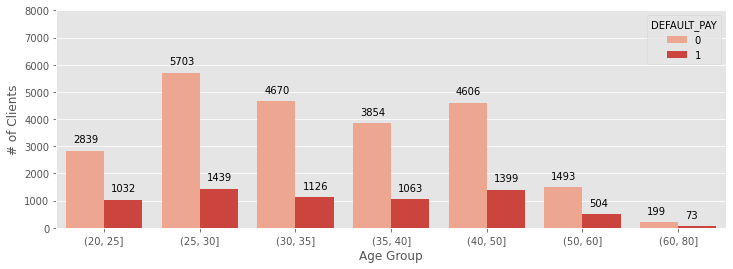

In [ ]:
#Présente le nombre des clients de Dataset par rapport à leur catégorie d'âge ainsi que leur défaut de paiement.
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80]) #Séparation des intervalles d'âge. 
df['DEFAULT_PAY'].groupby(df['AgeBin']).value_counts(normalize = True) #Grouper la colonne d'âge selon les intervalles de AgeBin.
plt.figure(figsize=(12,4))
df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
ax = sns.countplot(data = df, x = 'AgeBin', hue="DEFAULT_PAY", palette = 'Reds', order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()

<font color = pink>La plupart des clients avec un défaut de paiement appartiennent au groupe d'âge 25 – 30.

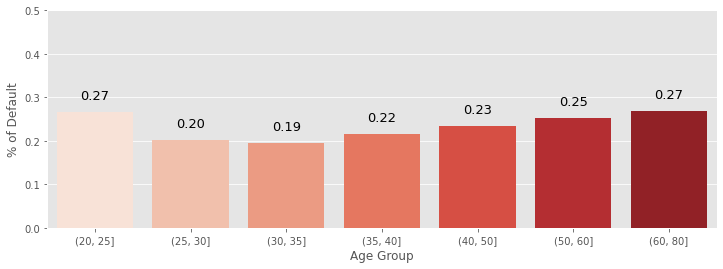

In [ ]:
#Présente le pourcentage des clients de Dataset par rapport à leur catégorie d'âge ainsi que leur défaut de paiement.
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "AgeBin", y = "DEFAULT_PAY", data = df, palette = 'Reds', ci = None, order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

<font color = pink>Les probabilités de défaut les plus faibles sont enregistrées autour de groupe 30 – 35 ans, alors que les plus élevées se situent au niveau des deux groupes 20 – 25 et 60 – 80.</font>

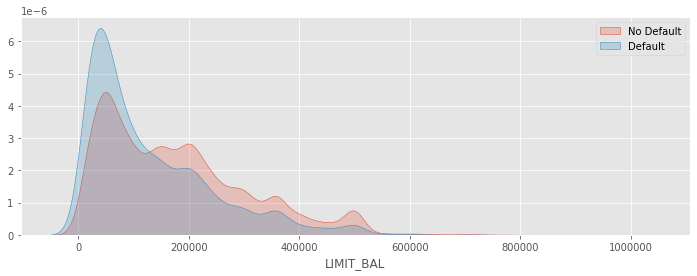

In [ ]:
#Explique le comportement de la fonction de densité sur la limite de crédit X1 pour les clients qui ont un défaut de paiement.
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['DEFAULT_PAY'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['DEFAULT_PAY'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

<font color = pink>La plupart des clients ont une limite de crédit de 200 000 et 
moins où il y a un pic plus important de clients en défaut sur cet 
intervalle.</font>

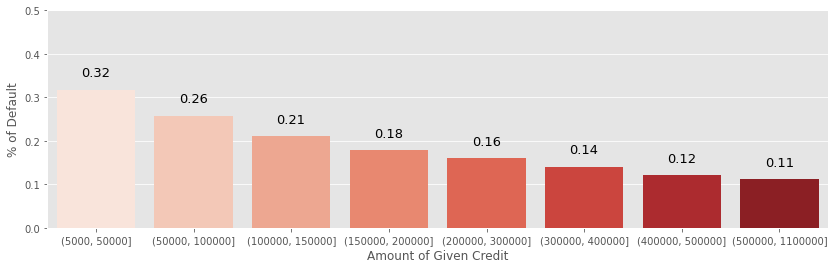

In [ ]:
#Décrit le pourcentage de défaut par rapport à leur limite de crédit X1.
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
plt.figure(figsize=(14,4))
df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']
ax = sns.barplot(x = "LimitBin", y = "DEFAULT_PAY", data = df, palette = 'Reds', ci = None, order = LimitBin_order)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

<font color = pink>On a un pic de 32% de défaut de la part des clients avec une 
limite de crédit de 50 000 et moins. Donc, on peut conclure que plus la limite est élevée, plus le risque de défaut est faible. </font>

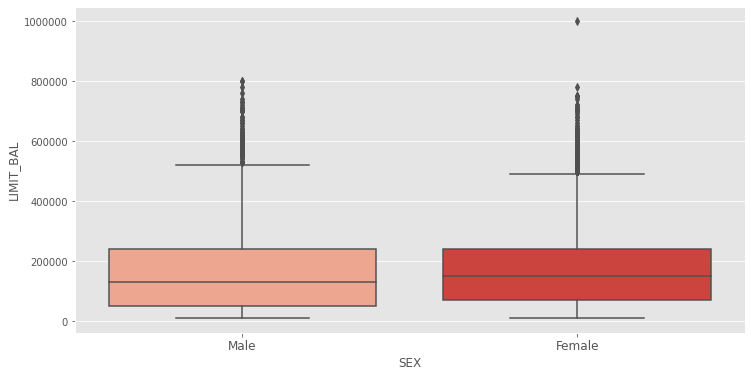

In [ ]:
#Décrit le crédit moyen accordé aux clients selon la caractéristique : sexe. 
plt.figure(figsize=(12,6))
sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, palette = 'Reds', showmeans=False, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.show()

<font color = pink>Le crédit moyen accordé aux femmes est légèrement supérieur à celui des hommes. </font>

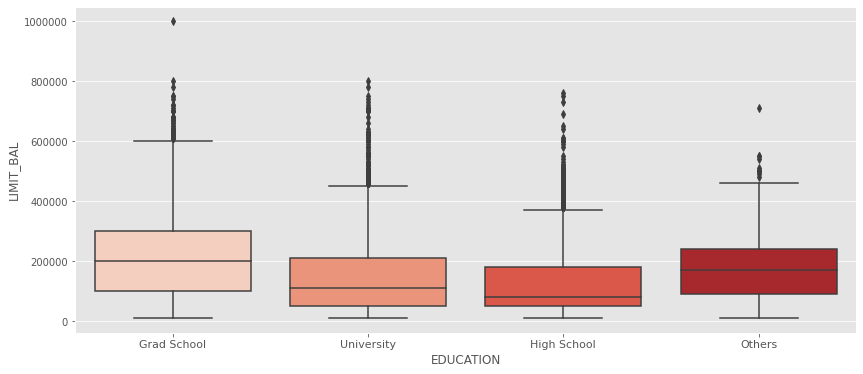

In [ ]:
#Décrit le crédit moyen accordé aux clients selon la caractéristique : éducation. 
plt.figure(figsize=(14,6))
sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'Reds', showmeans=False, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')   
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)
plt.show()

<font color = pink>Ceux avec un niveau éducatif « Graduate School » ont un crédit moyen supérieur aux autres. </font>

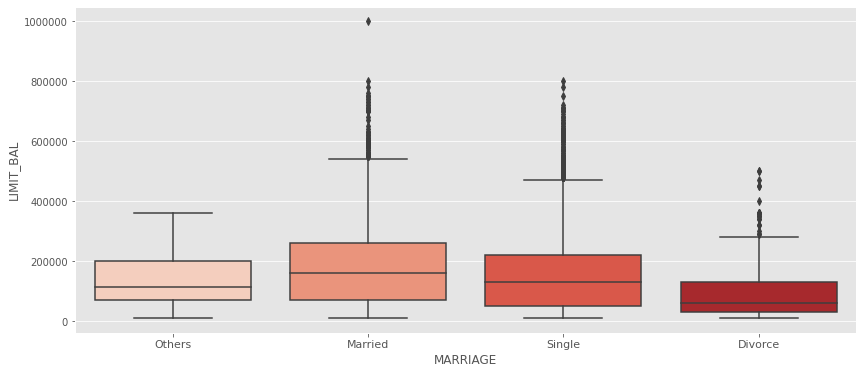

In [ ]:
#Décrit le crédit moyen accordé aux clients selon la caractéristique état civil.
plt.figure(figsize=(14,6))
sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, palette = 'Reds', showmeans=False, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')     
plt.xticks([0,1,2,3],['Others', 'Married', 'Single', 'Divorce'], fontsize = 11)
plt.show()

<font color = pink> Le groupe des mariés a le moyen de crédit le plus important. </font>

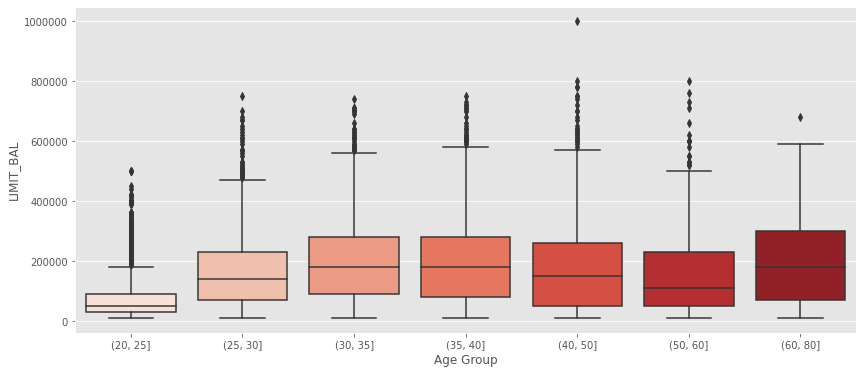

In [ ]:
#Décrit le crédit moyen accordé aux clients selon la caractéristique âge.
plt.figure(figsize=(14,6))
sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = df, palette = 'Reds', order = AgeBin_order, showmeans=False, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')    
plt.xlabel("Age Group", fontsize= 12)
plt.show()

<font color = pink>Ceux qui ont plus de limite sur le crédit sont âgés de plus de 50 ans. </font>

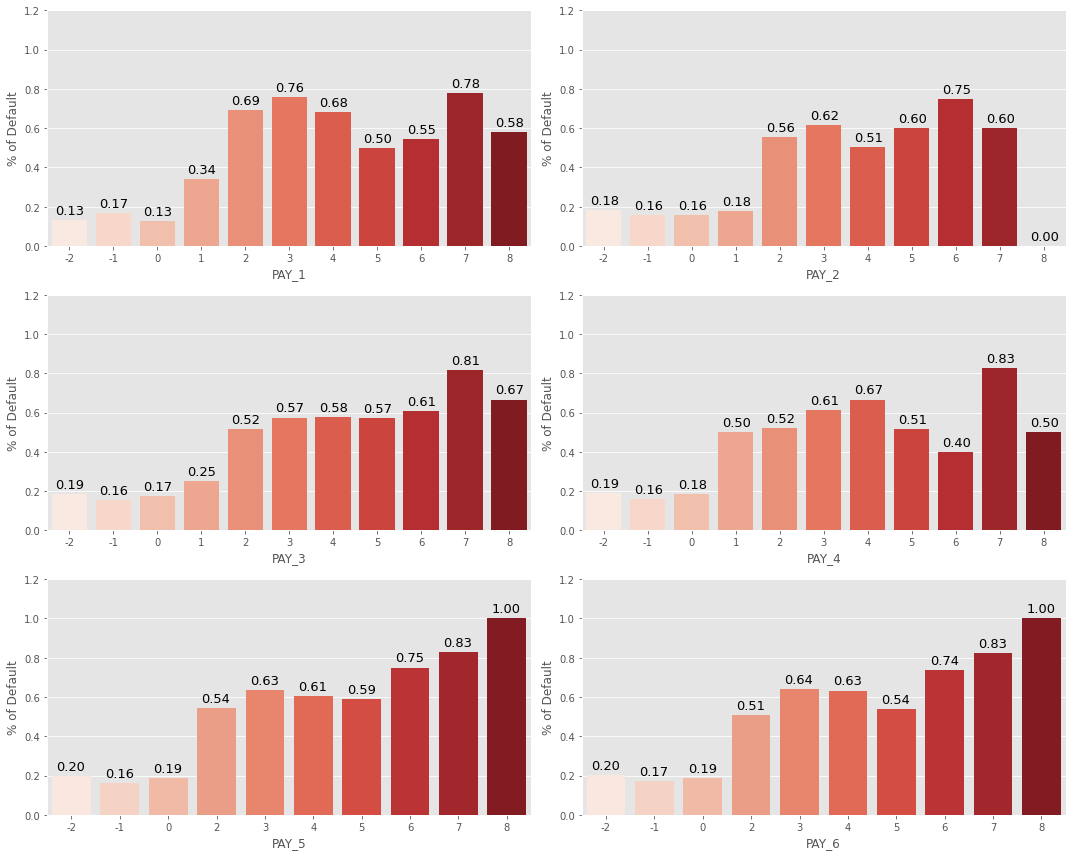

In [ ]:
#Présente le pourcentage de défaut en fonction de l'historique de paiement. 
#X6 – X11 prend 12 valeurs :
#-2 = Pas de consommation. 
#-1 = Payé en totalité. 
#0 = L'utilisation du crédit est renouvelable. 
#1 = Retard de paiement d’un mois. 
#2 = Retard de paiement de deux mois. , …, 
#8 = Retard de paiement de huit mois. 
#9 = Retard de paiement de neuf mois et plus. 
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "DEFAULT_PAY", data = df, palette = 'Reds', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)
plt.show()

<font color = pink>Dans le cas de deux mois au moins de retard, le nombre de clients avec un défaut de paiement dépasse le 50%. </font>

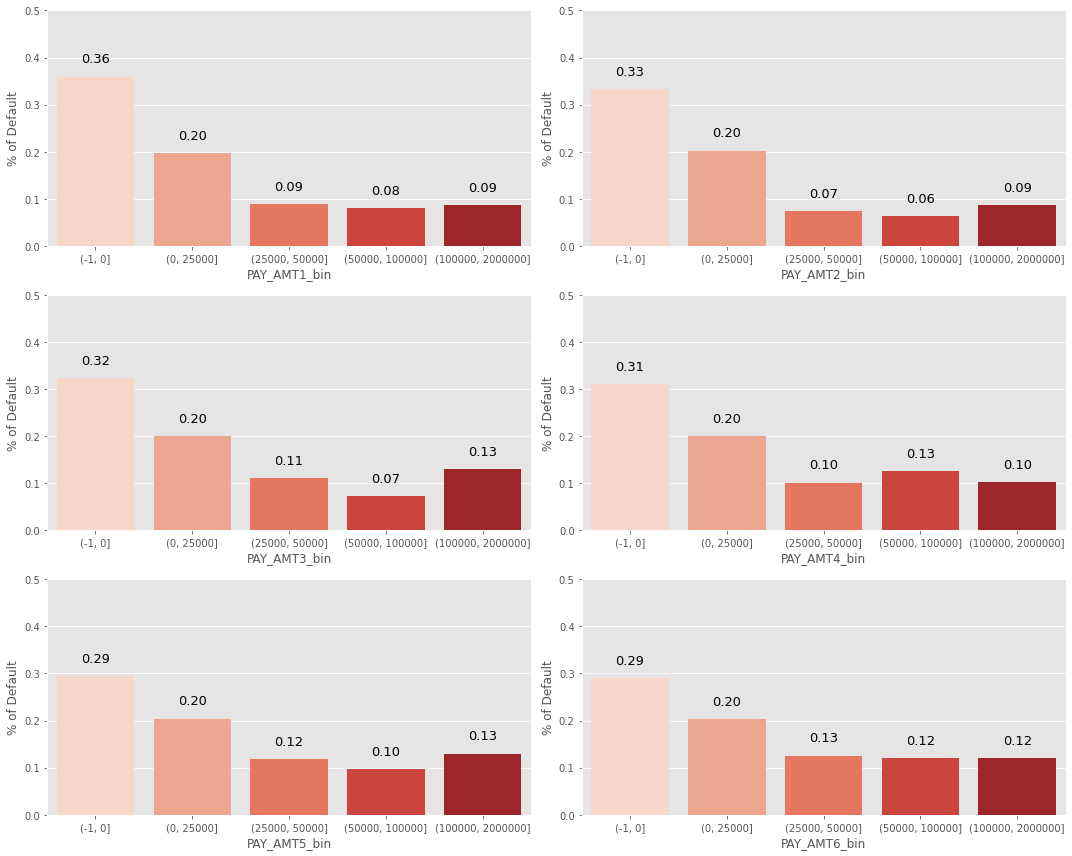

In [ ]:
#Décrit le montant payé en fonction du pourcentage de défaut durant le mois indiqué, c’est-à-dire de mois Septembre 2005 jusqu’à Avril 2005. 
df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']
for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "DEFAULT_PAY", data = df, palette = 'Reds', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

<font color = pink>On a un taux de défaut plus faible pour ceux qui ont payé plus de 25000 dollars. </font>

#### III. Data preparation 

Organiser les données pour la modélisation

<font color = pink> Détection des valeurs manquantes / valeurs nulles : </font>

Notre Dataset possède environ plus de 30 000 données avec 23 variables quantitatives et une valeur cible « Y » qui désigne le défaut de paiement à expliquer. 
Tout d’abord, nous avons vérifié que le tableau ne contenait pas de valeurs nulles, de même pour les lignes.

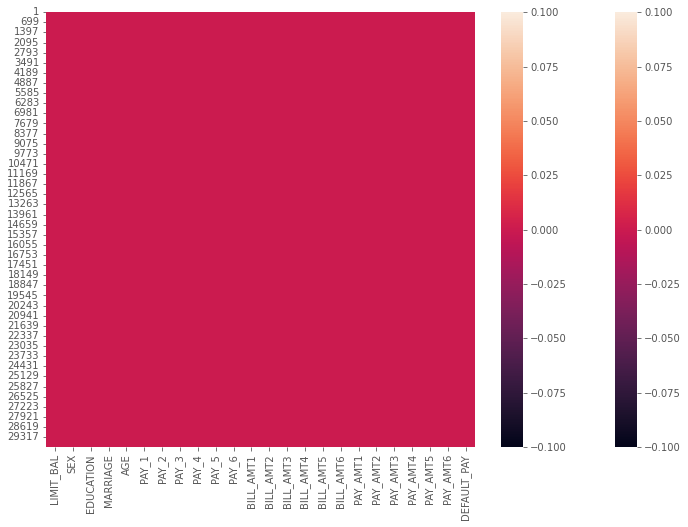

In [ ]:
sns.heatmap(df2.isna()) #Détecter les valeurs manquantes.
sns.heatmap(df2.isnull()) #Détecter les valeurs nulles.
plt.show()

<font color = pink>Le heatmap a montré la non-existence des valeurs manquantes et nulles. Donc, on va maintenant passer à la détection des valeurs dupliquées.</font>

In [ ]:
df2.duplicated().value_counts() #Détection des valeurs dupliquées.

False    29965
True        35
dtype: int64

In [ ]:
#Supprimer les valeurs dupliquées.
df3 = df2.drop_duplicates()
df3

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<font color = pink>Encodage des variables catégorielles en des valeurs numériques :</font>

In [ ]:
#Construction d'un dictionnaire pour la variable éducation afin de convertir les valeurs décimales en binaires :
{'EDUCATION': 'EDU'}.items()

dict_items([('EDUCATION', 'EDU')])

In [ ]:
#Créer et ajouter des colonnes binaires Dummies qui renvoient aux données 0 ou 1 :
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix) #Créer et ajouter des colonnes binaires Dummies qui renvoient aux données 0 ou 1.
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
#Application de OneHotEncoder :
df3 = onehot_encode(
        df3,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
df3

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY,EDU_1,EDU_2,EDU_3,EDU_4,MAR_0,MAR_1,MAR_2,MAR_3
1,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0,0,1,0,0,1,0,0
29997,150000,1,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0,0,1,0,0,0,1,0
29998,30000,1,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0,1,0,0,0,0,1,0
29999,80000,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,0,0,1,0,0,1,0,0


<font color = pink> Détection des valeurs aberrantes : </font>

In [ ]:
#Application de la méthode Z-score afin de distinguer les valeurs abberrantes (Outliers) :
df4 = df3.apply(stats.zscore)
df4

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY,EDU_1,EDU_2,EDU_3,EDU_4,MAR_0,MAR_1,MAR_2,MAR_3
1,-1.136285,0.810153,-1.246078,1.795105,1.782037,-0.698752,-0.668642,-1.532847,-1.488648,-0.643117,-0.648006,-0.668571,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
2,-0.365619,0.810153,-1.029141,-0.875185,1.782037,0.137468,0.187408,0.233623,1.992425,-0.659830,-0.667347,-0.639841,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
3,-0.596819,0.810153,-0.161397,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,-0.299280,-0.494553,-0.483045,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
4,-0.905085,0.810153,0.164007,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,-0.058284,-0.014093,0.032047,-0.233081,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
5,-0.905085,-1.234334,2.333368,-0.875185,0.110218,-0.698752,0.187408,0.233623,0.251888,-0.579253,-0.611935,-0.161927,-0.347669,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.405046,-1.234334,0.380943,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,1.869003,2.016713,2.325164,0.694467,-0.149982,-0.385023,0.170768,0.610418,-0.012982,-0.113857,0.012763,-0.237340,-0.533031,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
29997,-0.134420,-1.234334,0.814815,-0.875185,-0.725692,-0.698752,-0.668642,0.233623,0.251888,-0.673393,-0.665900,-0.628021,-0.533536,-0.578273,-0.653264,-0.231306,-0.104194,0.213800,-0.300023,-0.314331,-0.293562,-0.533031,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
29998,-1.059218,-1.234334,0.164007,3.575299,2.617946,1.809908,-0.668642,0.233623,0.251888,-0.647842,-0.644438,-0.638746,-0.348632,-0.325182,-0.328336,-0.342158,-0.257145,0.951876,-0.040297,-0.183493,-0.119275,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
29999,-0.673885,-1.234334,0.597879,0.905009,-0.725692,0.137468,0.187408,0.233623,-0.618380,-0.718575,0.409339,0.421450,0.147013,-0.468681,0.168314,4.841417,-0.109269,-0.230113,-0.185376,3.150512,-0.192138,1.876062,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,1.093784,-1.066444,-0.104387


In [ ]:
#Description des mesures statistiques de df4 de Z-score :
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,4.542263e-16,1.000017,-1.213351,-0.905085,-0.211486,0.559179,6.416238
SEX,29965.0,-1.154718e-14,1.000017,-1.234334,-1.234334,0.810153,0.810153,0.810153
AGE,29965.0,-1.730414e-16,1.000017,-1.571482,-0.812205,-0.161397,0.597879,4.719665
PAY_1,29965.0,2.784473e-15,1.000017,-1.765282,-0.875185,0.014912,0.014912,7.135686
PAY_2,29965.0,3.143083e-15,1.000017,-1.561601,-0.725692,0.110218,0.110218,6.797494
PAY_3,29965.0,1.838257e-15,1.000017,-1.534972,-0.698752,0.137468,0.137468,6.827228
PAY_4,29965.0,-5.384257e-16,1.000017,-1.524692,-0.668642,0.187408,0.187408,7.035810
PAY_5,29965.0,3.118287e-15,1.000017,-1.532847,-0.649612,0.233623,0.233623,7.299507
PAY_6,29965.0,4.240722e-15,1.000017,-1.488648,-0.618380,0.251888,0.251888,7.214035
BILL_AMT1,29965.0,4.075350e-16,1.000017,-2.944232,-0.647434,-0.391613,0.216911,12.398403


In [ ]:
#Suppression des Outliers dans df3 de BILL_AMT1 vers BILL_AMT6
indexNames1 = df4[ ((df4['BILL_AMT1'] >3) | (df4['BILL_AMT1'] <-3) ) ].index
print(len(indexNames1))
df3.drop(indexNames1 , inplace=True)
df4.drop(indexNames1 , inplace=True)
indexNames2 = df4[ ((df4['BILL_AMT2'] >3) | (df4['BILL_AMT2'] <-3) ) ].index
print(len(indexNames2))
df3.drop(indexNames2 , inplace=True)
df4.drop(indexNames2 , inplace=True)
indexNames3 = df4[ ((df4['BILL_AMT3'] >3) | (df4['BILL_AMT3'] <-3) ) ].index
print(len(indexNames3))
df3.drop(indexNames3 , inplace=True)
df4.drop(indexNames3 , inplace=True)
indexNames4 = df4[ ((df4['BILL_AMT4'] >3) | (df4['BILL_AMT4'] <-3) ) ].index
print(len(indexNames4))
df3.drop(indexNames4 , inplace=True)
df4.drop(indexNames4 , inplace=True)
indexNames5 = df4[ ((df4['BILL_AMT5'] >3) | (df4['BILL_AMT5'] <-3) ) ].index
print(len(indexNames5))
df3.drop(indexNames5 , inplace=True)
df4.drop(indexNames5 , inplace=True)
indexNames6 = df4[ ((df4['BILL_AMT6'] >3) | (df4['BILL_AMT6'] <-3) ) ].index
print(len(indexNames6))
df3.drop(indexNames6 , inplace=True)
df4.drop(indexNames6 , inplace=True)
df4

685
76
82
121
78
58


,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY,EDU_1,EDU_2,EDU_3,EDU_4,MAR_0,MAR_1,MAR_2,MAR_3
1,-1.136285,0.810153,-1.246078,1.795105,1.782037,-0.698752,-0.668642,-1.532847,-1.488648,-0.643117,-0.648006,-0.668571,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
2,-0.365619,0.810153,-1.029141,-0.875185,1.782037,0.137468,0.187408,0.233623,1.992425,-0.659830,-0.667347,-0.639841,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
3,-0.596819,0.810153,-0.161397,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,-0.299280,-0.494553,-0.483045,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
4,-0.905085,0.810153,0.164007,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,-0.058284,-0.014093,0.032047,-0.233081,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
5,-0.905085,-1.234334,2.333368,-0.875185,0.110218,-0.698752,0.187408,0.233623,0.251888,-0.579253,-0.611935,-0.161927,-0.347669,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.405046,-1.234334,0.380943,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,1.869003,2.016713,2.325164,0.694467,-0.149982,-0.385023,0.170768,0.610418,-0.012982,-0.113857,0.012763,-0.237340,-0.533031,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
29997,-0.134420,-1.234334,0.814815,-0.875185,-0.725692,-0.698752,-0.668642,0.233623,0.251888,-0.673393,-0.665900,-0.628021,-0.533536,-0.578273,-0.653264,-0.231306,-0.104194,0.213800,-0.300023,-0.314331,-0.293562,-0.533031,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
29998,-1.059218,-1.234334,0.164007,3.575299,2.617946,1.809908,-0.668642,0.233623,0.251888,-0.647842,-0.644438,-0.638746,-0.348632,-0.325182,-0.328336,-0.342158,-0.257145,0.951876,-0.040297,-0.183493,-0.119275,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
29999,-0.673885,-1.234334,0.597879,0.905009,-0.725692,0.137468,0.187408,0.233623,-0.618380,-0.718575,0.409339,0.421450,0.147013,-0.468681,0.168314,4.841417,-0.109269,-0.230113,-0.185376,3.150512,-0.192138,1.876062,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,1.093784,-1.066444,-0.104387


In [ ]:
#Suppression des Outliers dans df3 de PAY_AMT1 vers PAY_AMT6 :
indexNames1 = df4[ ((df4['PAY_AMT1'] >3) | (df4['PAY_AMT1'] <-3) ) ].index
print(len(indexNames1))
df3.drop(indexNames1 , inplace=True)
df4.drop(indexNames1 , inplace=True)
indexNames2 = df4[ ((df4['PAY_AMT2'] >3) | (df4['PAY_AMT2'] <-3) ) ].index
print(len(indexNames2))
df3.drop(indexNames2 , inplace=True)
df4.drop(indexNames2 , inplace=True)
indexNames3 = df4[ ((df4['PAY_AMT3'] >3) | (df4['PAY_AMT3'] <-3) ) ].index
print(len(indexNames3))
df3.drop(indexNames3 , inplace=True)
df4.drop(indexNames3 , inplace=True)
indexNames4 = df4[ ((df4['PAY_AMT4'] >3) | (df4['PAY_AMT4'] <-3) ) ].index
print(len(indexNames4))
df3.drop(indexNames4 , inplace=True)
df4.drop(indexNames4 , inplace=True)
indexNames5 = df4[ ((df4['PAY_AMT5'] >3) | (df4['PAY_AMT5'] <-3) ) ].index
print(len(indexNames5))
df3.drop(indexNames5 , inplace=True)
df4.drop(indexNames5 , inplace=True)
indexNames6 = df4[ ((df4['PAY_AMT6'] >3) | (df4['PAY_AMT6'] <-3) ) ].index
print(len(indexNames6))
df3.drop(indexNames6 , inplace=True)
df4.drop(indexNames6 , inplace=True)
df4

339
213
246
281
277
282


,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY,EDU_1,EDU_2,EDU_3,EDU_4,MAR_0,MAR_1,MAR_2,MAR_3
1,-1.136285,0.810153,-1.246078,1.795105,1.782037,-0.698752,-0.668642,-1.532847,-1.488648,-0.643117,-0.648006,-0.668571,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
2,-0.365619,0.810153,-1.029141,-0.875185,1.782037,0.137468,0.187408,0.233623,1.992425,-0.659830,-0.667347,-0.639841,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
3,-0.596819,0.810153,-0.161397,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,-0.299280,-0.494553,-0.483045,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
4,-0.905085,0.810153,0.164007,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,-0.058284,-0.014093,0.032047,-0.233081,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
5,-0.905085,-1.234334,2.333368,-0.875185,0.110218,-0.698752,0.187408,0.233623,0.251888,-0.579253,-0.611935,-0.161927,-0.347669,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388,-0.533031,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.673885,-1.234334,-0.161397,1.795105,1.782037,1.809908,1.899509,2.000094,1.992425,0.288825,0.399914,0.465850,0.531536,0.694695,0.709061,0.080252,-0.105321,-0.296984,0.138341,-0.314331,-0.068675,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
29996,0.405046,-1.234334,0.380943,0.014912,0.110218,0.137468,0.187408,0.233623,0.251888,1.869003,2.016713,2.325164,0.694467,-0.149982,-0.385023,0.170768,0.610418,-0.012982,-0.113857,0.012763,-0.237340,-0.533031,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,1.093784,-1.066444,-0.104387
29997,-0.134420,-1.234334,0.814815,-0.875185,-0.725692,-0.698752,-0.668642,0.233623,0.251888,-0.673393,-0.665900,-0.628021,-0.533536,-0.578273,-0.653264,-0.231306,-0.104194,0.213800,-0.300023,-0.314331,-0.293562,-0.533031,-0.737854,-0.937632,2.257575,-0.12596,-0.042489,-0.914257,0.937695,-0.104387
29998,-1.059218,-1.234334,0.164007,3.575299,2.617946,1.809908,-0.668642,0.233623,0.251888,-0.647842,-0.644438,-0.638746,-0.348632,-0.325182,-0.328336,-0.342158,-0.257145,0.951876,-0.040297,-0.183493,-0.119275,1.876062,-0.737854,1.066516,-0.442953,-0.12596,-0.042489,-0.914257,0.937695,-0.104387


In [ ]:
#Affichage de df3 :
df3

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY,EDU_1,EDU_2,EDU_3,EDU_4,MAR_0,MAR_1,MAR_2,MAR_3
1,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1,0,1,0,0,0,0,1,0
29996,220000,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0,0,1,0,0,1,0,0
29997,150000,1,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0,0,1,0,0,0,1,0
29998,30000,1,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0,1,0,0,0,0,1,0


In [ ]:
#Séparation des features Xi et de la variable cible Y :
X = df3.drop(['DEFAULT_PAY'], axis=1)  
y = df3['DEFAULT_PAY']

In [ ]:
#Mise à l'échelle des données avec StandardScaler : Normalisation des données :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
#Analyse des composantes principales ACP : Réduction de dimensionnalité :
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca.fit(scaled_X)
reduced = pca.transform(scaled_X)

In [ ]:
print(pca.n_components_)

16


In [ ]:
reduced.shape

(27227, 16)

In [ ]:
pca_df = pd.DataFrame(data = reduced, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13','PC 14','PC 15','PC 16'])

In [ ]:
pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16
0,-1.958810,-1.601225,1.090787,-1.438735,1.085768,-0.545905,0.812232,0.232593,0.375988,-0.250416,1.013248,-0.425053,-0.405723,0.713389,-0.347783,2.150889
1,-0.763503,-2.456514,-1.325073,-0.156873,1.369151,-0.004291,0.637911,0.240457,0.448994,-0.205998,-0.092222,0.318269,0.201860,-0.531669,0.360853,-0.594283
2,-0.660156,-1.319230,-0.945010,-0.602710,1.237741,0.322176,0.433091,0.065311,0.325752,-0.273139,0.159120,-0.289057,0.191109,-0.502517,0.201937,-0.516314
3,0.247113,-0.902584,1.572011,-0.898737,0.947747,-0.518710,0.572477,0.232420,0.463135,-0.126792,-0.286938,-0.020941,-0.109938,0.083041,-0.089470,0.408495
4,-0.291319,0.830715,2.183401,1.973031,1.936594,0.306279,-1.370720,-0.217197,-1.022660,0.454577,-2.781895,0.898215,-1.277867,0.103167,3.363491,0.889509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27222,4.465063,-2.770831,-1.057339,0.304015,0.829037,-0.080292,-0.807363,-0.429069,-0.761974,0.444167,0.001450,0.279523,-0.538574,-0.973793,-0.250333,-0.371314
27223,4.006879,2.171988,1.968249,-0.047087,-1.453581,1.520987,-0.518368,-0.400130,-1.211405,-0.394194,-1.861215,-0.790364,-0.682275,0.306218,0.611688,0.755454
27224,-1.948690,-0.291976,-0.178539,0.484897,-1.195315,2.235310,-0.610217,-0.619728,-1.224912,-0.526435,-0.838634,0.910225,1.221735,-0.059036,0.583853,-0.802615
27225,0.769959,-2.904992,-0.911525,1.165911,1.466489,0.288011,-0.847169,-0.514400,-0.981781,0.335533,1.786334,1.521067,2.332086,1.000497,-0.092797,1.080269


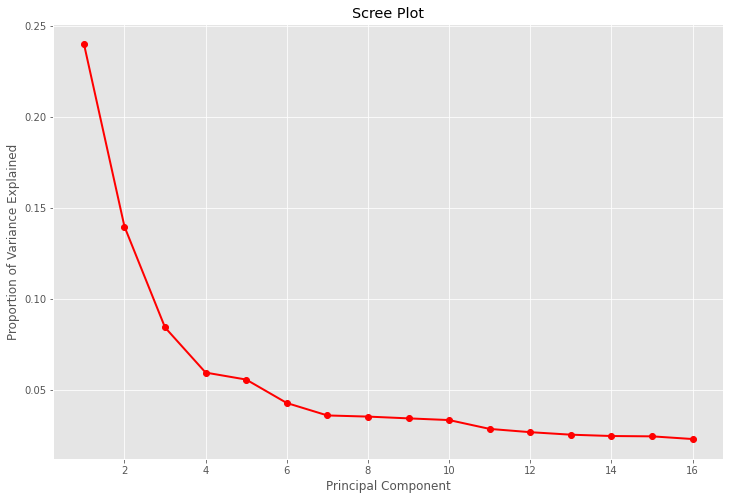

In [ ]:
#Représentation graphique de ACP :
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
X=scaled_X
X.shape

(27227, 29)

In [ ]:
#Diviser l'environnement du test 30% et d'apprentissage 70% :
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
#Equilibrer notre Dataset avec la méthode RandomUnderSampler :
#C'est une technique pour équilibrer les ensembles de données inégaux en conservant toutes les données dans la classe minoritaire
#et en diminuant la taille de la classe majoritaire.
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('original dataset shape:', y_train.shape)
print('Resample dataset shape', y_rus.shape)

original dataset shape: (19058,)
Resample dataset shape (8692,)


In [ ]:
#Equilibrer notre Dataset avec la méthode SMOTE :
#C'est une technique statistique permettant d'augmenter le nombre de cas dans notre ensemble de données de manière équilibrée.
#SMOTE prend l'ensemble de données entier comme entrée, mais il augmente le pourcentage uniquement des cas minoritaires.
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', y_train.shape)
print('Resample dataset shape', y_smote.shape)

Original dataset shape (19058,)
Resample dataset shape (29424,)


#### IV. Modeling 
###### Expliquer et justifier le choix, le paramétrage et le test de différents algorithmes.

<font color = pink>Application du modèle KNN sur notre Under Sampling Balanced 

---

Data : </font>

In [ ]:
#Instanciation de KNN Classifier :
KNN=KNeighborsClassifier()
#Recherche des paramètres optimaux :
param_grid = { 'n_neighbors' : list(range(1,40))   }
grid = GridSearchCV(KNN, param_grid)
grid.fit(x_rus, y_rus)
print(grid.best_params_)

{'n_neighbors': 38}


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6286
           1       0.48      0.55      0.51      1883

    accuracy                           0.76      8169
   macro avg       0.67      0.68      0.68      8169
weighted avg       0.77      0.76      0.76      8169



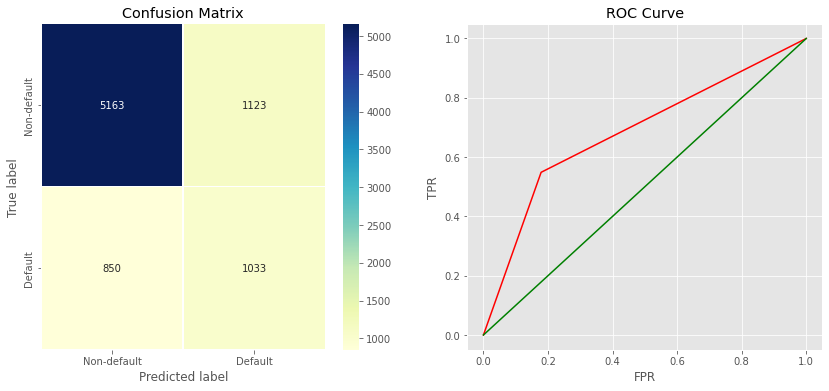

ROC_AUC Score : 0.6849708504294076


In [ ]:
#Appliquer le modèle KNN :
knn = KNeighborsClassifier(38)
knn_model = knn.fit(x_rus, y_rus)
y_pred_knn_rus = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn_rus))
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
fpr,tpr,thresholds = roc_curve(y_test, y_pred_knn_rus)
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_knn_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_knn_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_knn_rus))

<font color = pink>Application du modèle KNN sur notre Unbalanced Data : </font>




In [ ]:
#Instanciation de KNN Classifier :
KNN=KNeighborsClassifier()
#Recherche des paramètres optimaux :
param_grid = { 'n_neighbors' : list(range(1,40))   }
grid = GridSearchCV(KNN, param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'n_neighbors': 19}


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6286
           1       0.68      0.30      0.42      1883

    accuracy                           0.81      8169
   macro avg       0.75      0.63      0.65      8169
weighted avg       0.79      0.81      0.78      8169



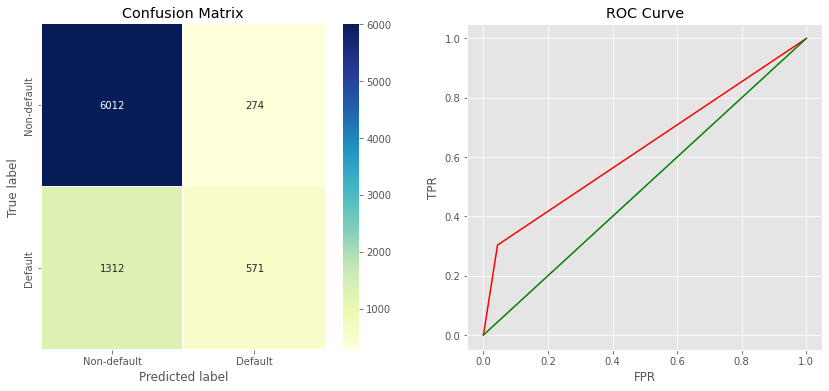

ROC_AUC Score : 0.6298252918209699


In [ ]:
#Entrainer le modèle KNN :
knn = KNeighborsClassifier(19)
knn_model = knn.fit(X_train, y_train)
y_pred_knn_unb = knn_model.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_knn_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_knn_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_knn_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_knn_unb))

<font color = pink>Application du modèle KNN sur SMOTE Balanced Data : </font>





In [ ]:
#Instanciation de KNN Classifier :
KNN=KNeighborsClassifier()
#Recherche des paramètres optimaux :
param_grid = { 'n_neighbors' : list(range(1,40))   }
grid = GridSearchCV(KNN, param_grid)
grid.fit(x_smote, y_smote)
print(grid.best_params_)

{'n_neighbors': 1}


              precision    recall  f1-score   support

           0       0.83      0.76      0.79      6286
           1       0.37      0.47      0.41      1883

    accuracy                           0.69      8169
   macro avg       0.60      0.62      0.60      8169
weighted avg       0.72      0.69      0.71      8169



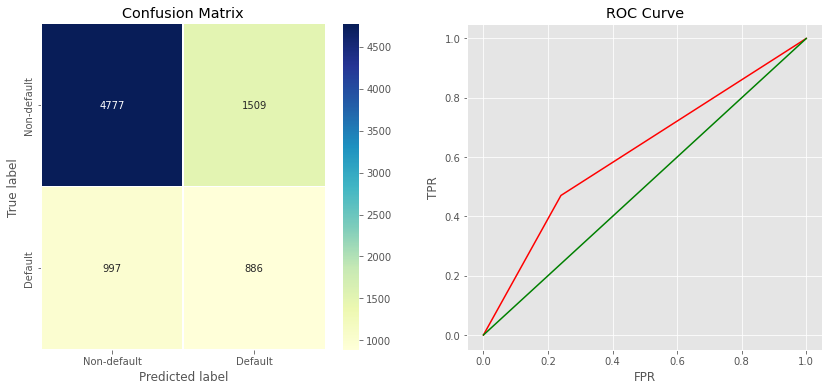

ROC_AUC Score : 0.6152342433235123


In [ ]:
#Entrainer le modèle KNN :
knn = KNeighborsClassifier(1)
knn_model = knn.fit(x_smote, y_smote)
y_pred_knn_smote = knn_model.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_knn_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_knn_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_knn_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_knn_smote))

<font color = pink>Application du modèle SVM sur notre Unbalanced Data : </font>

In [ ]:
#Définir les paramètres optimaux :
param_grid = {'C': [0.8, 1],  
              'gamma': ['scale','auto'], 
              'kernel': ['linear','rbf']}  

grid = GridSearchCV(SVC(), param_grid) 
#Entrainer le modèle SVM :
grid.fit(X_train, y_train)
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6286
           1       0.73      0.34      0.46      1883

    accuracy                           0.82      8169
   macro avg       0.78      0.65      0.67      8169
weighted avg       0.81      0.82      0.79      8169



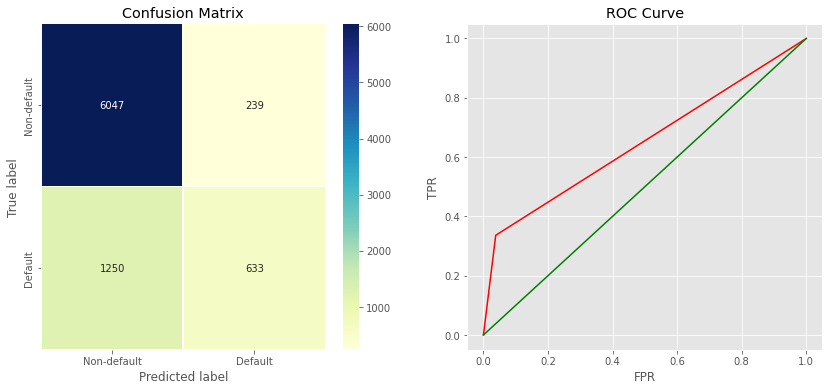

ROC_AUC Score : 0.6490723469987594


In [ ]:
#Appliquer le modèle SVM :
#Kernel rbf (Par Défaut) :
svm = SVC(C=1,kernel="rbf", gamma='scale')
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svm_unb = svm.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test,y_pred_svm_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test,y_pred_svm_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test,y_pred_svm_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test,y_pred_svm_unb))

<font color = pink>Application du modèle SVM sur notre UnderSampling Balanced Data : </font>

In [ ]:
#Définir les paramètres optimaux :
param_grid = {'C': [0.5, 1],  
              'gamma': ['scale','auto'], 
              'kernel': ['linear','rbf']}  
grid = GridSearchCV(SVC(), param_grid) 
#Entrainer le modèle SVM :
grid.fit(x_rus, y_rus)
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6286
           1       0.51      0.60      0.55      1883

    accuracy                           0.77      8169
   macro avg       0.69      0.71      0.70      8169
weighted avg       0.79      0.77      0.78      8169



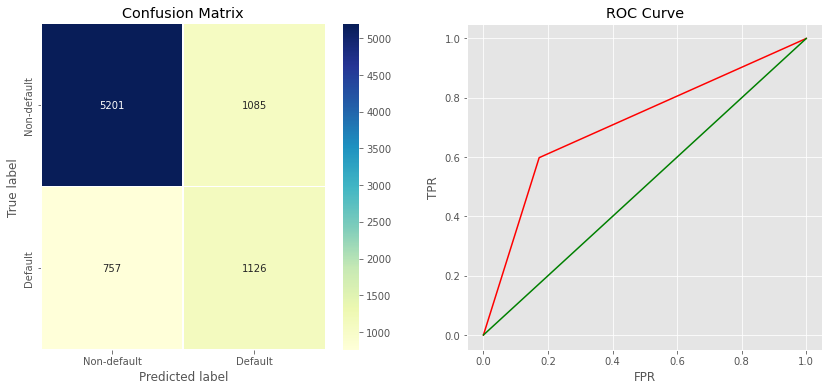

ROC_AUC Score : 0.7126880765304855


In [ ]:
#Entrainer le modèle SVM :
#Kernel rbf (Par Défaut) :
svm = SVC(C=1,kernel="rbf", gamma='scale')
svm.fit(x_rus, y_rus)
from sklearn.metrics import classification_report
y_pred_svm_rus = svm.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test,y_pred_svm_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test,y_pred_svm_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test,y_pred_svm_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test,y_pred_svm_rus))

<font color = pink>Application du modèle SVM sur SMOTE Balanced Data : </font>

In [ ]:
from sklearn.svm import SVC
#Définir les paramètres optimaux :
param_grid = {'C': [0.7, 1],  
              'gamma': ['scale','auto'], 
              'kernel': ['linear','rbf']}  
grid = GridSearchCV(SVC(), param_grid) 
grid.fit(x_smote, y_smote)
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6286
           1       0.51      0.59      0.55      1883

    accuracy                           0.78      8169
   macro avg       0.69      0.71      0.70      8169
weighted avg       0.79      0.78      0.78      8169



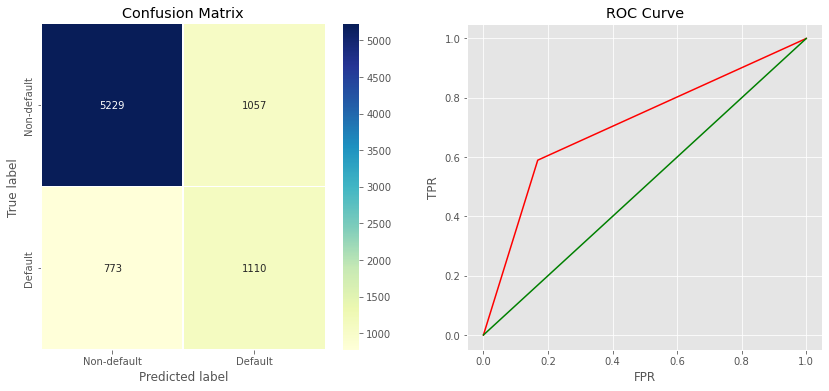

ROC_AUC Score : 0.7106667084581658


In [ ]:
#Entrainer le modèle SVM :
#Kernel rbf (Par Défaut) :
svm = SVC(C=1,kernel="rbf", gamma='auto')
svm.fit(x_smote, y_smote)
from sklearn.metrics import classification_report
y_pred_svm_smote = svm.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test,y_pred_svm_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test,y_pred_svm_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test,y_pred_svm_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test,y_pred_svm_smote))

<font color = pink>Application du modèle ADD sur notre Unbalanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
dcgrid = {'max_depth': [3,6],
             'min_samples_leaf':[10,12],
             'min_samples_split':[10, 32],
             'criterion':['gini','entropy'] }
#Instanciation de DecisionTree :
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=dcgrid)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6286
           1       0.69      0.34      0.46      1883

    accuracy                           0.81      8169
   macro avg       0.76      0.65      0.67      8169
weighted avg       0.80      0.81      0.79      8169



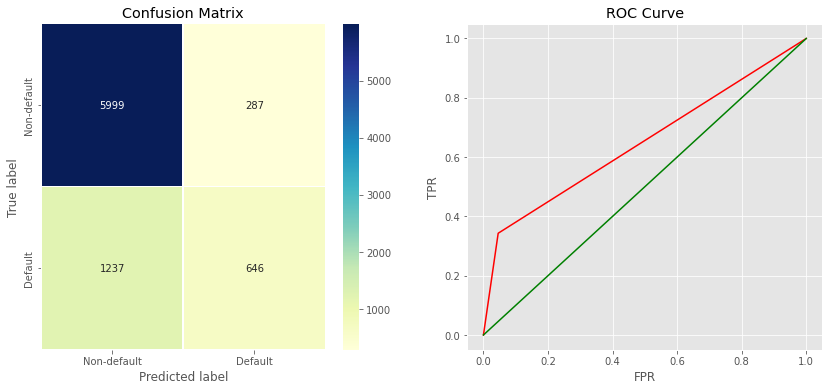

ROC_AUC Score : 0.6487062771225843


In [ ]:
#Entrainer le modèle ADD :
dct = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=2)
dct.fit(X_train, y_train)
y_pred_dct_unb=dct.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_dct_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_dct_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_dct_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_dct_unb))

<font color = pink>Application du modèle ADD sur notre UnderSampling Balanced Data : </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Définir les paramètres optimaux :
dcgrid = {'max_depth': [3,6],
             'min_samples_leaf':[10,12],
             'min_samples_split':[10, 32],
             'criterion':['gini','entropy'] }
#Instanciation de ADD :
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=dcgrid)
grid_search.fit(x_rus, y_rus)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      6286
           1       0.45      0.63      0.53      1883

    accuracy                           0.74      8169
   macro avg       0.66      0.70      0.67      8169
weighted avg       0.78      0.74      0.75      8169



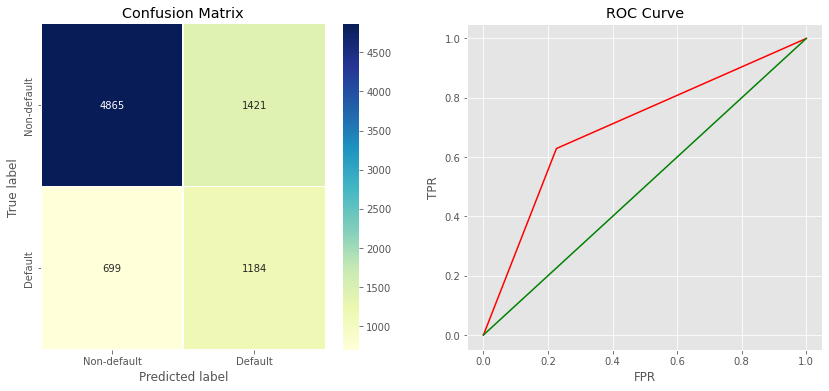

ROC_AUC Score : 0.7013629745454287


In [ ]:
#Entrainer le modèle ADD :
dct = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=12, min_samples_split=32)
dct.fit(x_rus, y_rus)
y_pred_dct_rus=dct.predict(X_test)
print(classification_report(y_test, y_pred_dct_rus))
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_dct_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_dct_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_dct_rus))

<font color = pink>Application du modèle ADD sur SMOTE Balanced Data : </font>

In [ ]:
#Définir les paramètres optimaux :
dcgrid = {'max_depth': [3,6],
             'min_samples_leaf':[10,12],
             'min_samples_split':[10, 32],
             'criterion':['gini','entropy'] }
# Instanciation de ADD :         
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=dcgrid)
grid_search.fit(x_smote, y_smote)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10}


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6286
           1       0.54      0.50      0.52      1883

    accuracy                           0.79      8169
   macro avg       0.70      0.69      0.69      8169
weighted avg       0.78      0.79      0.78      8169



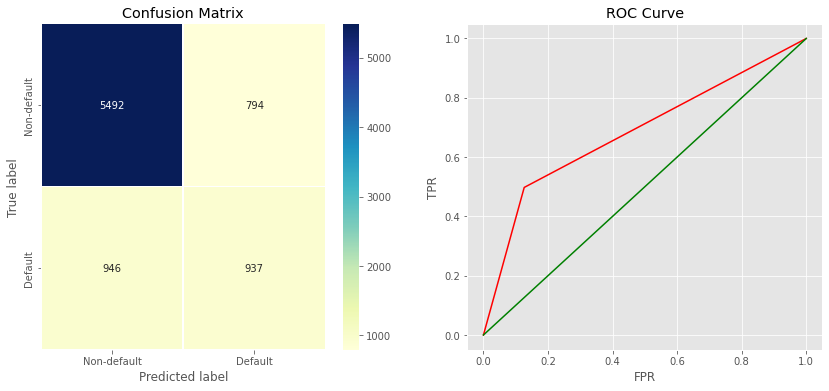

ROC_AUC Score : 0.685648878075667


In [ ]:
#Entrainer le modèle ADD :
dct = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=10, min_samples_split=10)
dct.fit(x_smote, y_smote)
y_pred_dct_smote=dct.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_dct_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_dct_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_dct_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_dct_smote))

<font color = pink> Application du modèle AdaBoost sur notre Unbalanced Data :</font>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#Définir les paramètres optimaux :
adaparam_grid = {'n_estimators': [200,300],
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate' : [0.5, 0.75, 1.0]}
#Instanciation d'AdaBoost Classifier :
ada = AdaBoostClassifier()
grid_ada = GridSearchCV(ada, adaparam_grid, scoring = 'recall', cv=5,n_jobs = -1)
grid_ada.fit(X_train,y_train)
print(grid_ada.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6286
           1       0.68      0.35      0.46      1883

    accuracy                           0.81      8169
   macro avg       0.76      0.65      0.67      8169
weighted avg       0.80      0.81      0.79      8169



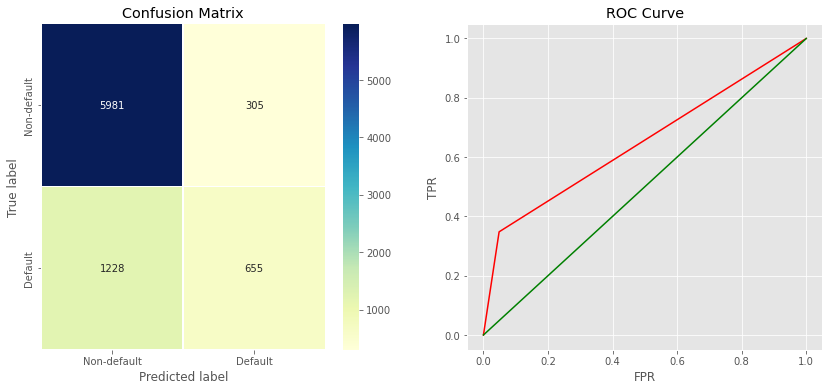

ROC_AUC Score : 0.6496643275254977


In [ ]:
#Appliquer le modèle AdaBoost :
adac = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=300)
adac.fit(X_train,y_train)
y_pred_adac_unb=adac.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_adac_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_adac_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_adac_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_adac_unb))

<font color = pink>Application du modèle AdaBoost sur notre UnderSampling Balanced Data : </font>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#Recherche des paramètres optimaux :
adaparam_grid = {'n_estimators': [200,300],
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate' : [0.5, 0.75, 1.0]}
#Instanciation de AdaBoost Classifier :
ada = AdaBoostClassifier()
grid_ada = GridSearchCV(ada, adaparam_grid, scoring = 'recall', cv=5,n_jobs = -1)
grid_ada.fit(x_rus,y_rus)
print(grid_ada.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6286
           1       0.46      0.65      0.53      1883

    accuracy                           0.74      8169
   macro avg       0.67      0.71      0.68      8169
weighted avg       0.78      0.74      0.75      8169



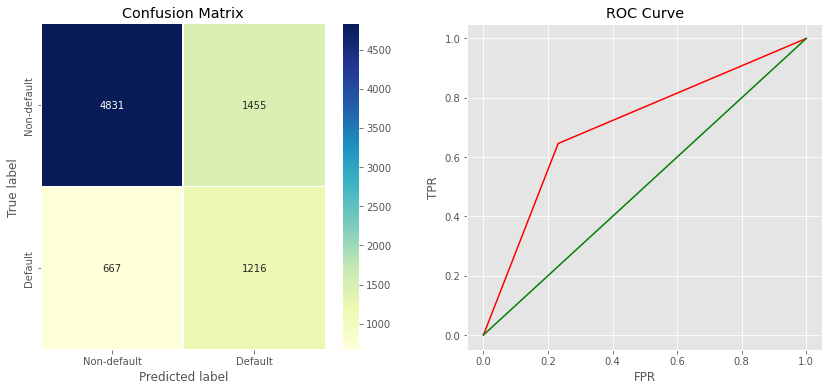

ROC_AUC Score : 0.7071556311482293


In [ ]:
#Entrainer le modèle AdaBoost :
adac = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=300)
adac.fit(x_rus,y_rus)
y_pred_adac_rus=adac.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_adac_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_adac_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_adac_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_adac_rus))

<font color = pink>Application du modèle AdaBoost sur SMOTE Balanced Data : </font>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#Recherche des paramètres optimaux :
adaparam_grid = {'n_estimators': [200,300],
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate' : [0.5, 0.75, 1.0]}
#Instanciation du AdaBoost :
ada = AdaBoostClassifier()
grid_ada = GridSearchCV(ada, adaparam_grid, scoring = 'recall', cv=5,n_jobs = -1)
grid_ada.fit(x_smote,y_smote)
print(grid_ada.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6286
           1       0.54      0.52      0.53      1883

    accuracy                           0.79      8169
   macro avg       0.70      0.69      0.70      8169
weighted avg       0.78      0.79      0.79      8169



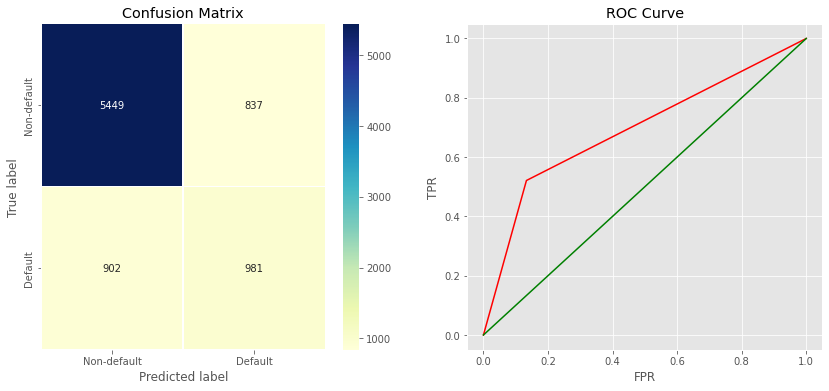

ROC_AUC Score : 0.6939120628007953


In [ ]:
#Appliquer le modèle AdaBoost :
adac = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=300)
adac.fit(x_smote,y_smote)
y_pred_adac_smote=adac.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_adac_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_adac_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_adac_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_adac_smote))

<font color = pink >Application du modèle XGBoost sur notre Unbalanced Data : </font>

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Définir les paramètres optimaux :
xgbparam_grid = {"learning_rate"    : [0.10, 0.15, 0.20] ,
                  "max_depth"        : [6, 12],
                 "min_child_weight" : [3, 5, 7],
                 "gamma"            : [0.1, 0.3],
                 "colsample_bytree" : [0.4, 0.5] }
#Instanciation de XGBoost Classifier :
xgb= XGBClassifier()                 
xgb_grid = GridSearchCV(xgb, xgbparam_grid ,n_jobs = -1)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6286
           1       0.68      0.38      0.49      1883

    accuracy                           0.82      8169
   macro avg       0.76      0.66      0.69      8169
weighted avg       0.80      0.82      0.80      8169



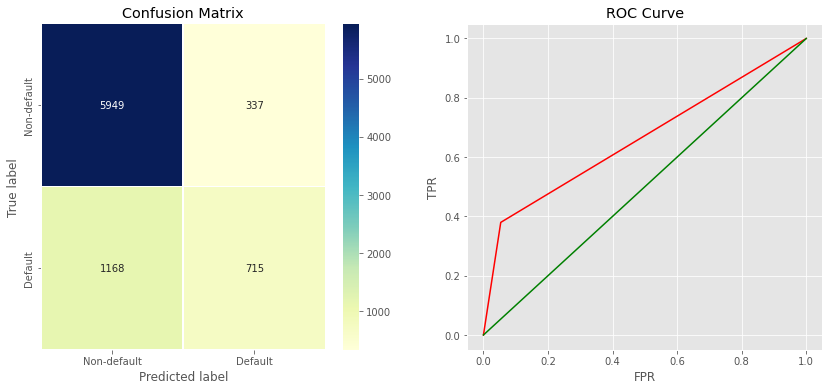

ROC_AUC Score : 0.6630510120442312


In [ ]:
#Entrainer le modèle XGBoost :
xgbc = XGBClassifier(colsample_bytree=0.5, gamma= 0.1, learning_rate=0.1, max_depth=6, min_child_weight=7)
xgbc.fit(X_train, y_train)
y_pred_xgbc_unb=xgbc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_xgbc_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_xgbc_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_xgbc_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_xgbc_unb))

<font color = pink>Application du modèle XGBoost sur notre UnderSampling Balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
xgbparam_grid = {"learning_rate"    : [0.10, 0.05] ,
                  "max_depth"        : [6, 12],
                 "min_child_weight" : [5, 7],
                 "gamma"            : [0.1, 0.3],
                 "colsample_bytree" : [0.4, 0.5] }
#Instanciation de XGBoost Classifier :
xgb= XGBClassifier()                 
xgb_grid = GridSearchCV(xgb, xgbparam_grid ,n_jobs = -1)
xgb_grid.fit(x_rus, y_rus)
print(xgb_grid.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 12, 'min_child_weight': 5}


              precision    recall  f1-score   support

           0       0.88      0.73      0.80      6286
           1       0.43      0.68      0.53      1883

    accuracy                           0.72      8169
   macro avg       0.66      0.70      0.66      8169
weighted avg       0.78      0.72      0.74      8169



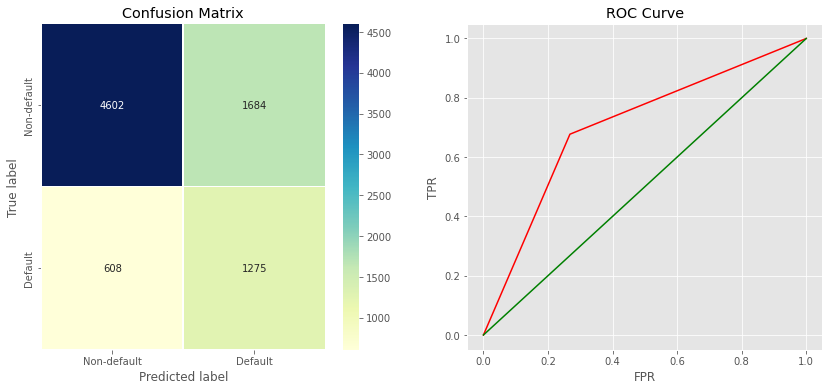

ROC_AUC Score : 0.7046070396597384


In [ ]:
#Entrainer le modèle XGBoost :
xgbc = XGBClassifier(colsample_bytree=0.5, gamma= 0.3, learning_rate=0.05, max_depth=12, min_child_weight=5)
xgbc.fit(x_rus, y_rus)
y_pred_xgbc_rus=xgbc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_xgbc_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_xgbc_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_xgbc_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_xgbc_rus))

<font color = pink>Application du modèle XGBoost sur SMOTE Balanced Data :</font>

In [ ]:
#Recherche des paramètres optimaux :
xgbparam_grid = {"learning_rate"    : [0.10, 0.05] ,
                  "max_depth"        : [6, 12],
                 "min_child_weight" : [5],
                 "gamma"            : [0.1, 0.3],
                 "colsample_bytree" : [0.4, 0.5] }
#Instanciation de XGBoost Classifier :
xgb= XGBClassifier()                 
xgb_grid = GridSearchCV(xgb, xgbparam_grid ,n_jobs = -1)
xgb_grid.fit(x_smote, y_smote)
print(xgb_grid.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 5}


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      6286
           1       0.61      0.44      0.51      1883

    accuracy                           0.80      8169
   macro avg       0.73      0.68      0.69      8169
weighted avg       0.79      0.80      0.79      8169



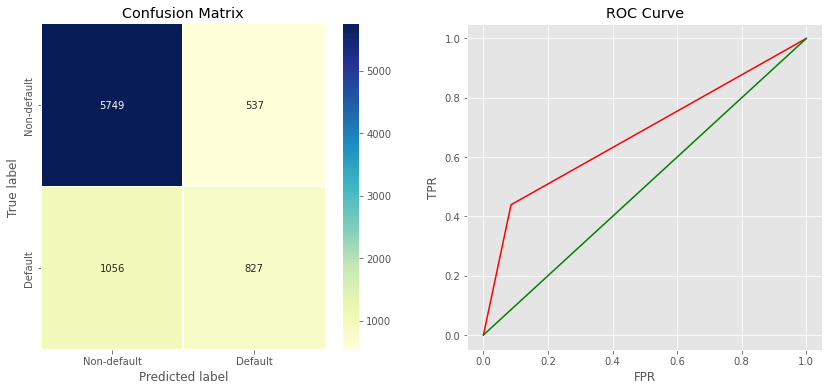

ROC_AUC Score : 0.6768824211944404


In [ ]:
#Entrainer le modèle XGBoost :
xgbc = XGBClassifier(colsample_bytree=0.5, gamma= 0.1, learning_rate=0.1, max_depth=12, min_child_weight=5)
xgbc.fit(x_smote, y_smote)
y_pred_xgbc_smote=xgbc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_xgbc_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_xgbc_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_xgbc_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_xgbc_smote))

<font color = pink>Application du modèle Random Forest sur notre Unbalanced Data : </font>



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Recherche des paramètres optimaux :
clfparam_grid = {'n_estimators' : [100,200],
                 'max_features' : [16,29],
                 'criterion':['gini','entropy']}
#Instanciation de Random Forest :
clf = RandomForestClassifier()
clf_grid = GridSearchCV(clf, clfparam_grid ,n_jobs = -1)
clf_grid.fit(X_train, y_train)
print(clf_grid.best_params_)

{'criterion': 'entropy', 'max_features': 16, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6286
           1       0.66      0.40      0.49      1883

    accuracy                           0.81      8169
   macro avg       0.75      0.67      0.69      8169
weighted avg       0.80      0.81      0.80      8169



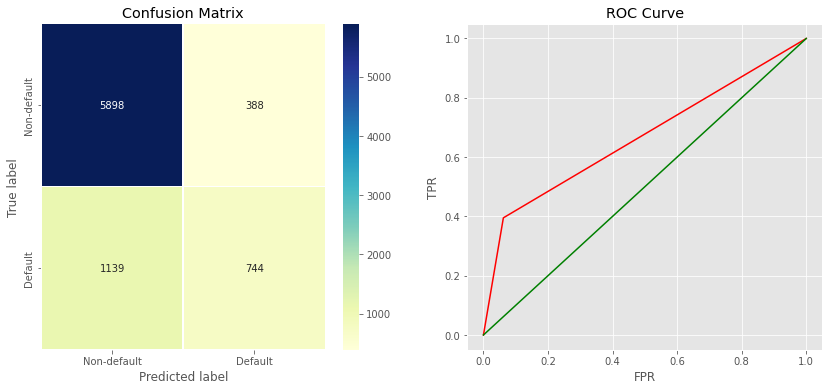

ROC_AUC Score : 0.666694856215559


In [ ]:
#Entrainer le modèle Random Forest :
clfc = RandomForestClassifier(criterion='entropy', max_features=16, n_estimators=200)
clfc.fit(X_train, y_train)
y_pred_clfc_unb=clfc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_clfc_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_clfc_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_clfc_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_clfc_unb))

<font color = pink>Application du modèle Random Forest sur notre UnderSampling Balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
clfparam_grid = {'n_estimators' : [100,200],
                 'max_features' : [16,29],
                 'criterion':['gini','entropy']}
#Instanciation de Random Forest :
clf = RandomForestClassifier()
clf_grid = GridSearchCV(clf, clfparam_grid ,n_jobs = -1)
clf_grid.fit(x_rus, y_rus)
print(clf_grid.best_params_)

{'criterion': 'entropy', 'max_features': 29, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.88      0.73      0.80      6286
           1       0.43      0.67      0.52      1883

    accuracy                           0.72      8169
   macro avg       0.66      0.70      0.66      8169
weighted avg       0.78      0.72      0.74      8169



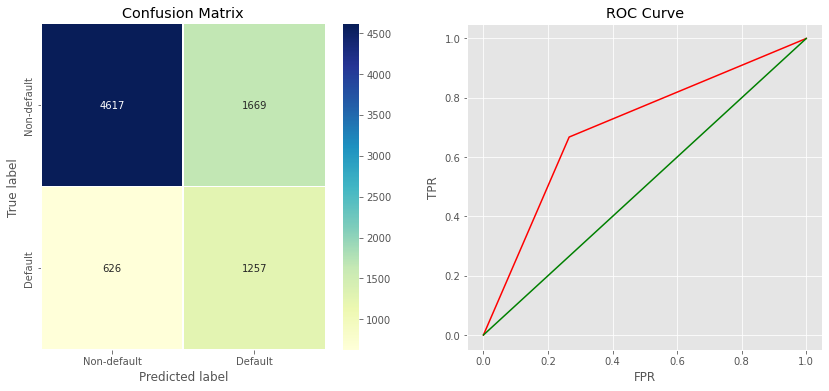

ROC_AUC Score : 0.7010205602347579


In [ ]:
#Entrainer le modèle Random Forest :
clfc = RandomForestClassifier(criterion='entropy', max_features=29, n_estimators=100)
clfc.fit(x_rus, y_rus)
y_pred_clfc_rus=clfc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_clfc_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_clfc_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_clfc_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_clfc_rus))

<font color = pink>Application du modèle Random Forest sur SMOTE Balanced Data : </font>



In [ ]:
#Recherche des paramètres optimaux :
clfparam_grid = {'n_estimators' : [100,200],
                 'max_features' : [16,29],
                 'criterion':['gini','entropy']}
#Instanciation de Random Forest :        
clf = RandomForestClassifier()
clf_grid = GridSearchCV(clf, clfparam_grid ,n_jobs = -1)
clf_grid.fit(x_smote, y_smote)
print(clf_grid.best_params_)

{'criterion': 'entropy', 'max_features': 16, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6286
           1       0.58      0.47      0.52      1883

    accuracy                           0.80      8169
   macro avg       0.71      0.68      0.69      8169
weighted avg       0.79      0.80      0.79      8169



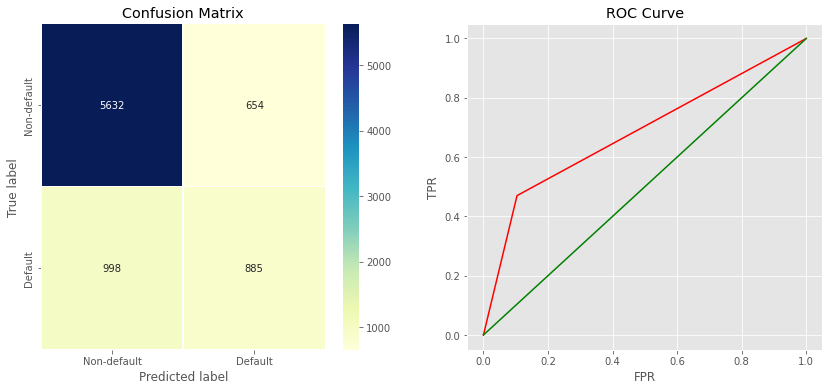

ROC_AUC Score : 0.6829769819519864


In [ ]:
#Entrainer le modèle Random Forest :
clfc = RandomForestClassifier(criterion='entropy', max_features=16, n_estimators=200)
clfc.fit(x_smote, y_smote)
y_pred_clfc_smote=clfc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_clfc_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_clfc_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_clfc_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_clfc_smote))

<font color = pink>Application du modèle Logistic Regression sur notre Unbalanced Data : </font>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Recherche des paramètres optimaux :
logparam_grid = {'C': np.logspace(-5, 8, 15),                
                  }
#Instanciation de Logistic Regression :
logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,logparam_grid,)
logreg_grid.fit(X_train, y_train)
print(logreg_grid.best_params_)

{'C': 3.727593720314938}


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      6286
           1       0.70      0.25      0.37      1883

    accuracy                           0.80      8169
   macro avg       0.75      0.61      0.63      8169
weighted avg       0.78      0.80      0.76      8169



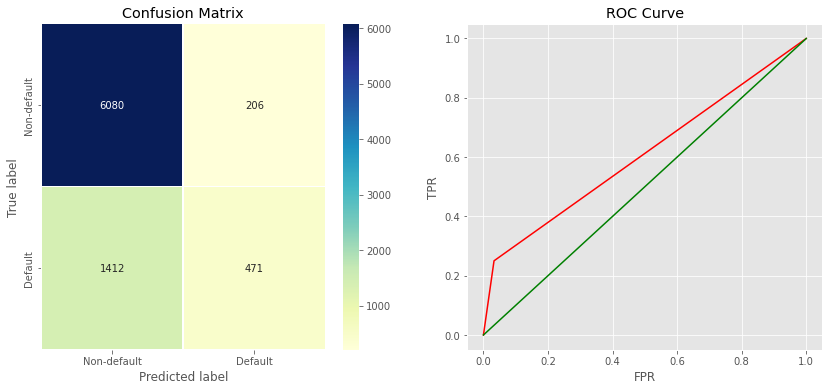

ROC_AUC Score : 0.6086807645951883


In [ ]:
#Entrainer le modèle Logistic Regression :
logregc=LogisticRegression(C=3.727593720314938)
logregc.fit(X_train, y_train)
y_pred_logregc_unb=logregc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_logregc_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_logregc_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_logregc_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_logregc_unb))

<font color = pink>Application du modèle Logistic Regression sur notre UnderSampling Balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
logparam_grid = {'C': np.logspace(-5, 8, 15),                
                  }
#Instanciation de Logistic Regression :
logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,logparam_grid,)
logreg_grid.fit(x_rus, y_rus)
print(logreg_grid.best_params_)

{'C': 0.4393970560760795}


              precision    recall  f1-score   support

           0       0.88      0.68      0.77      6286
           1       0.39      0.67      0.49      1883

    accuracy                           0.68      8169
   macro avg       0.63      0.68      0.63      8169
weighted avg       0.76      0.68      0.70      8169



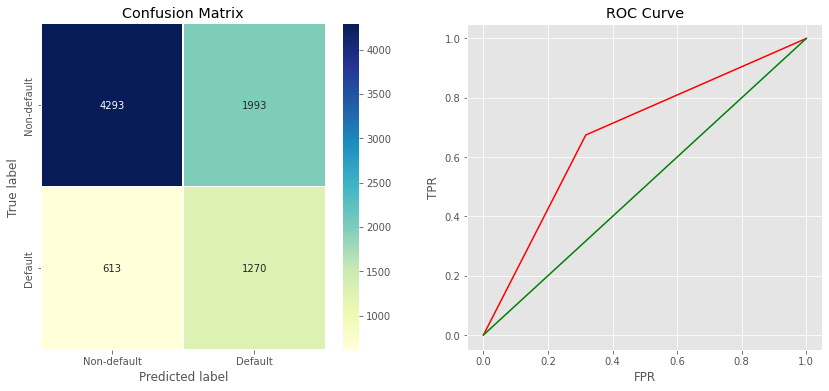

ROC_AUC Score : 0.6787009427925631


In [ ]:
#Entrainer le modèle Logistic Regression :
logregc=LogisticRegression(C=0.4393970560760795)
logregc.fit(x_rus, y_rus)
y_pred_logregc_rus=logregc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_logregc_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_logregc_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_logregc_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_logregc_rus))

<font color = pink>Application du modèle Logistic Regression sur SMOTE Balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
logparam_grid = {'C': np.logspace(-5, 8, 15),                
                  }
#Instanciation de Logistic Regression :
logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,logparam_grid,)
logreg_grid.fit(x_smote, y_smote)
print(logreg_grid.best_params_)

{'C': 268.2695795279727}


              precision    recall  f1-score   support

           0       0.87      0.68      0.76      6286
           1       0.38      0.68      0.49      1883

    accuracy                           0.68      8169
   macro avg       0.63      0.68      0.63      8169
weighted avg       0.76      0.68      0.70      8169



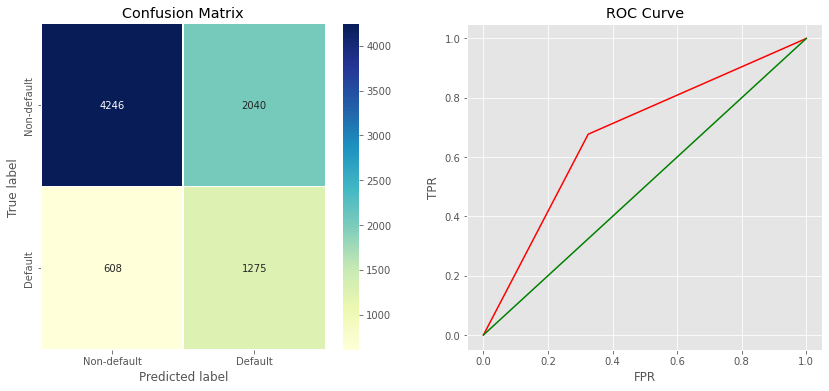

ROC_AUC Score : 0.6762901449731332


In [ ]:
#Entrainer le modèle Logistic Regression :
logregc=LogisticRegression(C=268.2695795279727)
logregc.fit(x_smote, y_smote)
y_pred_logregc_smote=logregc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_logregc_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_logregc_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_logregc_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_logregc_smote))

<font color = pink>Application du modèle GradientBoost sur notre Unbalanced Data : </font>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Recherche des paramètres optimaux :
gradb_param_grid = {'n_estimators': [200,300],
                  'learning_rate' : [0.5, 0.75, 1.0]}
#Instanciation de GradientBoost :        
gbc = GradientBoostingClassifier()
gradb_grid=GridSearchCV(gbc,gradb_param_grid)
gradb_grid.fit(X_train, y_train)
print(gradb_grid.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6286
           1       0.61      0.39      0.47      1883

    accuracy                           0.80      8169
   macro avg       0.72      0.66      0.68      8169
weighted avg       0.78      0.80      0.79      8169



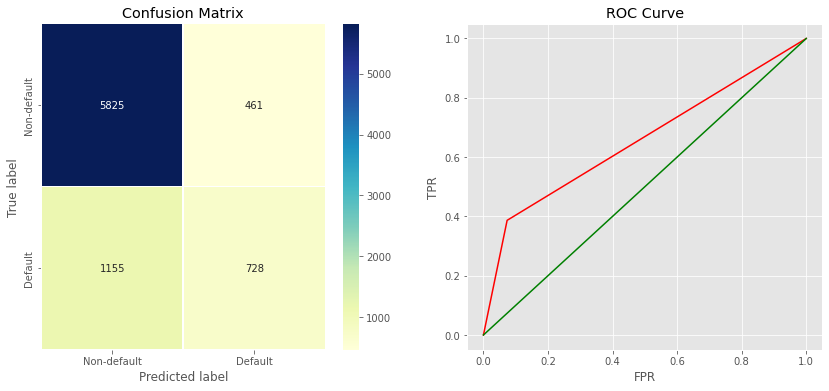

ROC_AUC Score : 0.6566397624035001


In [ ]:
#Entrainer le modèle GradientBoost :
gradbc=GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
gradbc.fit(X_train, y_train)
y_pred_gradbc_unb=gradbc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_gradbc_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_gradbc_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_gradbc_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_gradbc_unb))

<font color = pink>Application du modèle GrandientBoost sur notre UnderSampling Balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
gradb_param_grid = {'n_estimators': [200,300],
                  'learning_rate' : [0.5, 0.75, 1.0]}
#Instanciation de GrandientBoost :
gbc = GradientBoostingClassifier()
gradb_grid=GridSearchCV(gbc,gradb_param_grid)
gradb_grid.fit(x_rus, y_rus)
print(gradb_grid.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.88      0.69      0.77      6286
           1       0.40      0.69      0.50      1883

    accuracy                           0.69      8169
   macro avg       0.64      0.69      0.64      8169
weighted avg       0.77      0.69      0.71      8169



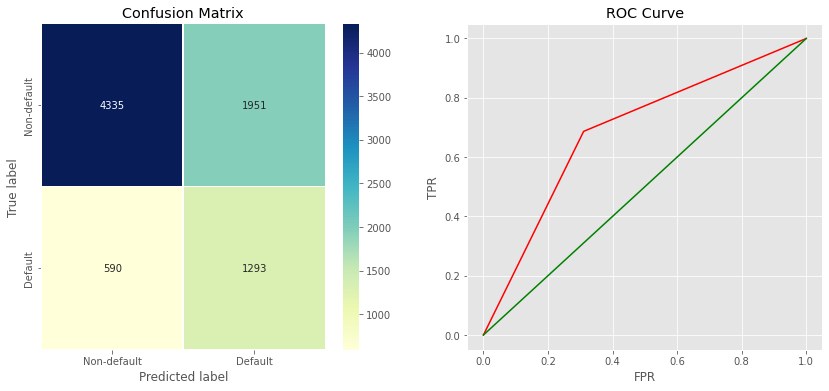

ROC_AUC Score : 0.6881489756548748


In [ ]:
#Entrainer le modèle GradientBoost :
gradbc=GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
gradbc.fit(x_rus, y_rus)
y_pred_gradbc_rus=gradbc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_gradbc_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_gradbc_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_gradbc_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_gradbc_rus))

<font color = pink>Application du modèle GradientBoost sur SMOTE balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
gradb_param_grid = {'n_estimators': [200,300],
                  'learning_rate' : [0.5, 0.75, 1.0]}
#Instanciation de GradientBoost :
gbc = GradientBoostingClassifier()
gradb_grid=GridSearchCV(gbc,gradb_param_grid)
gradb_grid.fit(x_smote, y_smote)
print(gradb_grid.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6286
           1       0.60      0.43      0.50      1883

    accuracy                           0.80      8169
   macro avg       0.72      0.67      0.69      8169
weighted avg       0.79      0.80      0.79      8169



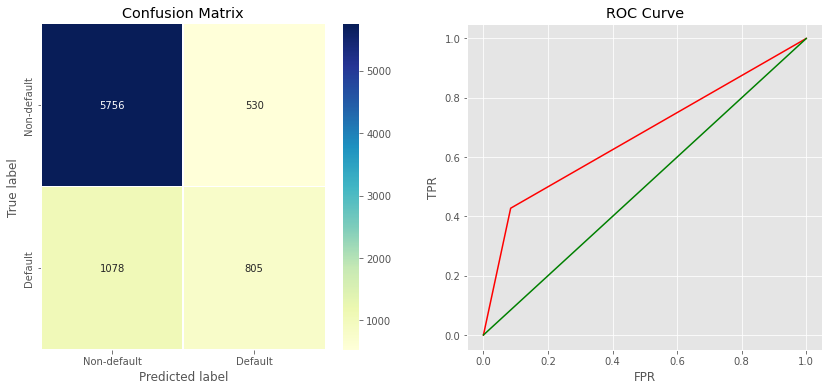

ROC_AUC Score : 0.6715974721662702


In [ ]:
#Entrainer le modèle GradientBoost :
gradbc=GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
gradbc.fit(x_smote, y_smote)
y_pred_gradbc_smote=gradbc.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_gradbc_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_gradbc_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_gradbc_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_gradbc_smote))

<font color = pink>Application du modèle Naive Bayes sur notre Unbalanced Data : </font>


In [ ]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.88      0.55      0.68      6286
           1       0.33      0.74      0.46      1883

    accuracy                           0.60      8169
   macro avg       0.60      0.65      0.57      8169
weighted avg       0.75      0.60      0.63      8169



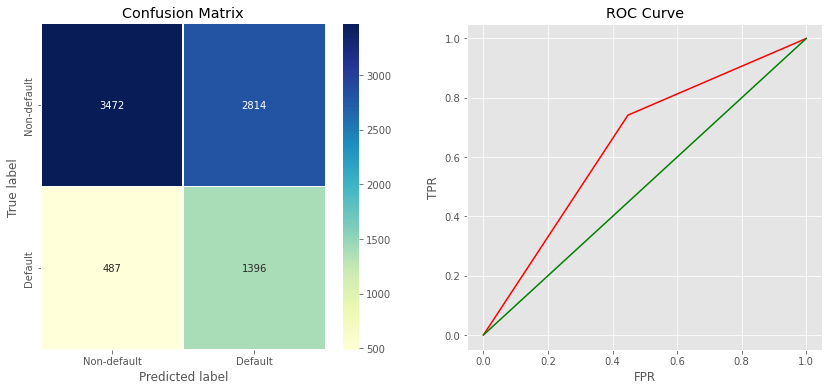

ROC_AUC Score : 0.6468543420381871


In [ ]:
#Instanciation de Naive Bayes :
gnb = GaussianNB()
#Entrainer le modèle Naive Bayes :
gnb.fit(X_train, y_train)
y_pred_NV_unb = gnb.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_NV_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_NV_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_NV_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_NV_unb))

<font color = pink>Application du modèle Naive Bayes sur notre UnderSampling Balanced Data : </font>

              precision    recall  f1-score   support

           0       0.89      0.39      0.54      6286
           1       0.29      0.85      0.44      1883

    accuracy                           0.49      8169
   macro avg       0.59      0.62      0.49      8169
weighted avg       0.76      0.49      0.51      8169



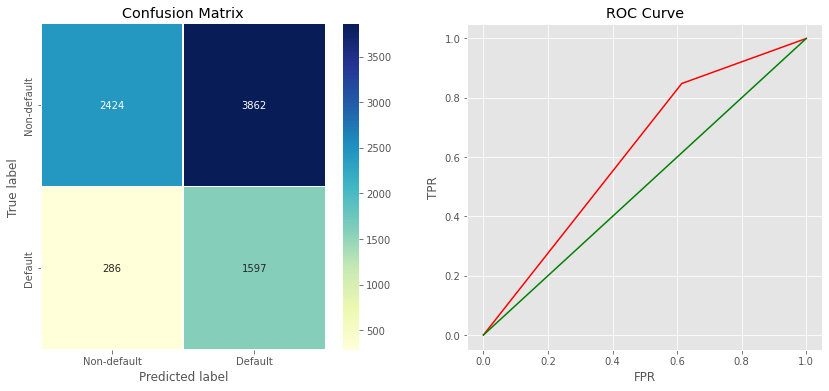

ROC_AUC Score : 0.6168667730378596


In [ ]:
#Entrainer le modèle Naive Bayes :
gnb = GaussianNB()
gnb.fit(x_rus, y_rus)
y_pred_NV_rus = gnb.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_NV_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_NV_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_NV_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_NV_rus))

<font color = pink>Application du modèle Naive Bayes sur SMOTE Balanced Data : </font>

              precision    recall  f1-score   support

           0       0.89      0.35      0.50      6286
           1       0.28      0.86      0.43      1883

    accuracy                           0.47      8169
   macro avg       0.59      0.60      0.46      8169
weighted avg       0.75      0.47      0.48      8169



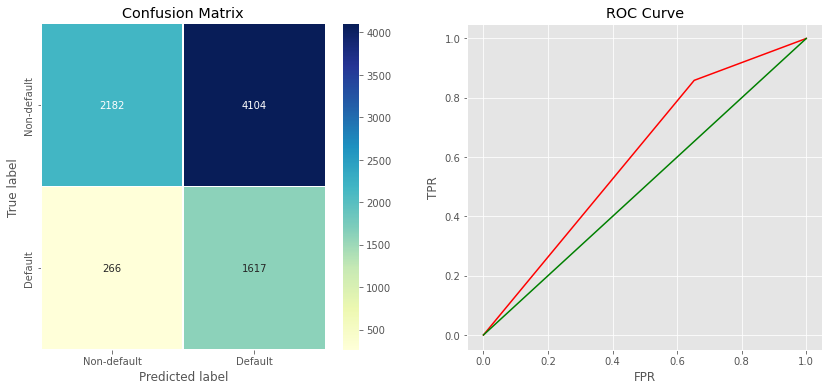

ROC_AUC Score : 0.6029283224537445


In [ ]:
#Entrainer le modèle Naive Bayes :
gnb = GaussianNB()
gnb.fit(x_smote, y_smote)
y_pred_NV_smote = gnb.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_NV_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_NV_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_NV_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_NV_smote))

<font color = pink>Application du modèle Linear Discriminant Analysis sur notre 

---

Unbalanced Data : </font>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#Recherche des paramètres optimaux :
lda = LinearDiscriminantAnalysis()
lda_param_grid    =          {
    'store_covariance' :(True, False)
    }
#Instanciation du modèle Linear Discriminant Analysis :
lda_grid=GridSearchCV(lda,lda_param_grid)
lda_grid.fit(X_train, y_train)
print(lda_grid.best_params_)

{'store_covariance': True}


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6286
           1       0.69      0.28      0.39      1883

    accuracy                           0.80      8169
   macro avg       0.75      0.62      0.64      8169
weighted avg       0.79      0.80      0.77      8169



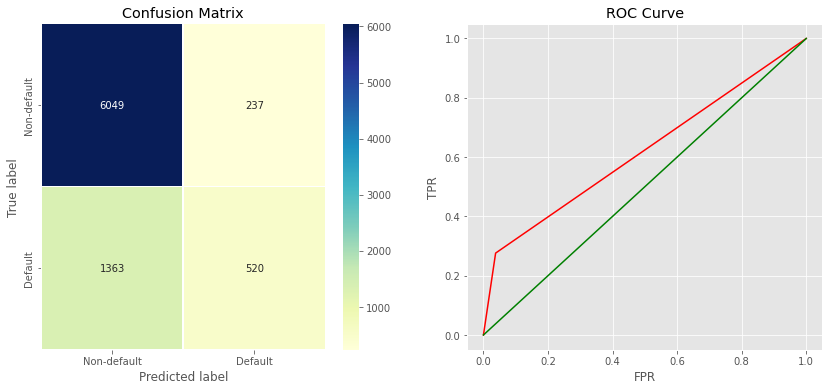

ROC_AUC Score : 0.6192261200023181


In [ ]:
#Entrainer le modèle Linear Discriminant Analysis :
ldac=LinearDiscriminantAnalysis(store_covariance=True)
ldac.fit(X_train, y_train)
y_pred_ldac_unb=ldac.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_ldac_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_ldac_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_ldac_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_ldac_unb))

<font color = pink>Application du modèle Linear Discriminant Analysis sur notre UnderSampling Balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
lda = LinearDiscriminantAnalysis()
lda_param_grid    =          {
    'store_covariance' :(True, False)
    }
#Instanciation du modèle Linear Discriminant Analysis :
lda_grid=GridSearchCV(lda,lda_param_grid)
lda_grid.fit(x_rus, y_rus)
print(lda_grid.best_params_)

{'store_covariance': True}


              precision    recall  f1-score   support

           0       0.88      0.69      0.77      6286
           1       0.40      0.67      0.50      1883

    accuracy                           0.69      8169
   macro avg       0.64      0.68      0.64      8169
weighted avg       0.76      0.69      0.71      8169



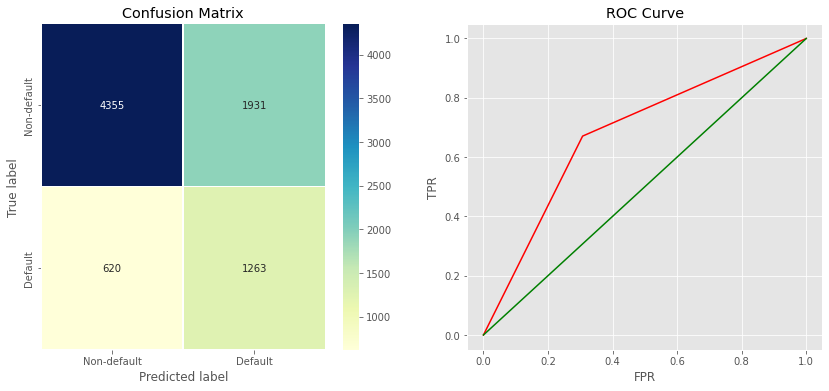

ROC_AUC Score : 0.6817738007515374


In [ ]:
#Entrainer le modèle Linear Discriminant Analysis :
ldac=LinearDiscriminantAnalysis(store_covariance=True)
ldac.fit(x_rus, y_rus)
y_pred_ldac_rus=ldac.predict(X_test)
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_ldac_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_ldac_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_ldac_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_ldac_rus))

<font color = pink>Application du modèle Linear Discriminant Analysis sur SMOTE Balanced Data : </font>

In [ ]:
#Recherche des paramètres optimaux :
lda = LinearDiscriminantAnalysis()
lda_param_grid    =          {
    'store_covariance' :(True, False)
    }
#Instanciation du modèle Linear Discriminant Analysis :
lda_grid=GridSearchCV(lda,lda_param_grid)
lda_grid.fit(x_smote, y_smote)
print(lda_grid.best_params_)

{'store_covariance': True}


              precision    recall  f1-score   support

           0       0.87      0.68      0.77      6286
           1       0.39      0.67      0.49      1883

    accuracy                           0.68      8169
   macro avg       0.63      0.68      0.63      8169
weighted avg       0.76      0.68      0.71      8169



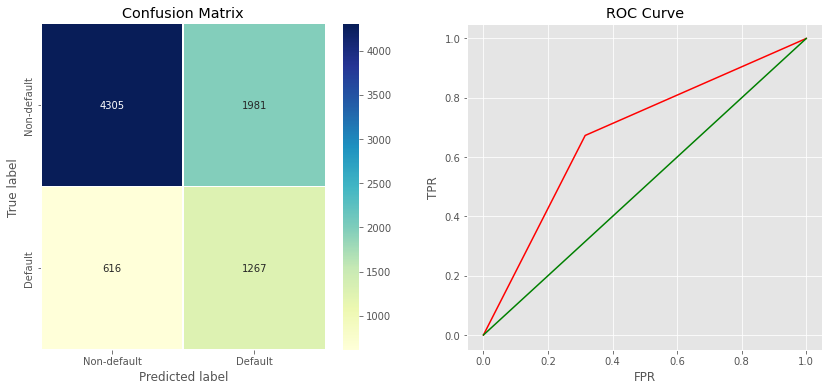

ROC_AUC Score : 0.6788588436923026


In [ ]:
#Entrainer le modèle Linear Discriminant Analysis :
ldac=LinearDiscriminantAnalysis(store_covariance=True)
ldac.fit(x_smote, y_smote)
y_pred_ldac_smote=ldac.predict(X_test)
# Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_ldac_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_ldac_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_ldac_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_ldac_smote))

<font color = pink>Application du modèle ANN :</font>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras import backend as K
#Calcul de recall :
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
#Calcul de precision :
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
#Calcul de f1_score :
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#Définir le modèle keras :
ANN_model = Sequential()
ANN_model.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
ANN_model.add(Dense(units=40, activation='relu'))
ANN_model.add(Dense(units=30, activation='relu'))
ANN_model.add(Dense(units=20, activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid',))
#Compiler le modèle keras :
ANN_model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['acc',f1_m,precision_m, recall_m])
#Ajuster le modèle keras sur l'ensemble de données :
ANN_model.fit(X_train,y_train, epochs=100, batch_size=10)
#Faire des prédictions de classe avec le modèle ANN sur notre Unbalanced Data:
y_pred_annc_unb= ANN_model.predict(X_test)
y_pred_annc_unb = (y_pred_annc_unb > 0.5)

Epoch 1/100
1906/1906 [==============================] - 6s 2ms/step - loss: 0.4673 - acc: 0.8029 - f1_m: 0.3244 - precision_m: 0.4417 - recall_m: 0.2894
Epoch 2/100
1906/1906 [==============================] - 5s 3ms/step - loss: 0.4473 - acc: 0.8105 - f1_m: 0.3608 - precision_m: 0.4793 - recall_m: 0.3246
Epoch 3/100
1906/1906 [==============================] - 4s 2ms/step - loss: 0.4419 - acc: 0.8128 - f1_m: 0.3687 - precision_m: 0.4902 - recall_m: 0.3344
Epoch 4/100
1906/1906 [==============================] - 4s 2ms/step - loss: 0.4378 - acc: 0.8148 - f1_m: 0.3604 - precision_m: 0.4806 - recall_m: 0.3231
Epoch 5/100
1906/1906 [==============================] - 4s 2ms/step - loss: 0.4349 - acc: 0.8151 - f1_m: 0.3669 - precision_m: 0.4934 - recall_m: 0.3287
Epoch 6/100
1906/1906 [==============================] - 4s 2ms/step - loss: 0.4330 - acc: 0.8155 - f1_m: 0.3703 - precision_m: 0.4909 - recall_m: 0.3322
Epoch 7/100
1906/1906 [==============================] - 4s 2ms/step - loss:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6286
           1       0.52      0.44      0.47      1883

    accuracy                           0.78      8169
   macro avg       0.68      0.66      0.67      8169
weighted avg       0.76      0.78      0.77      8169



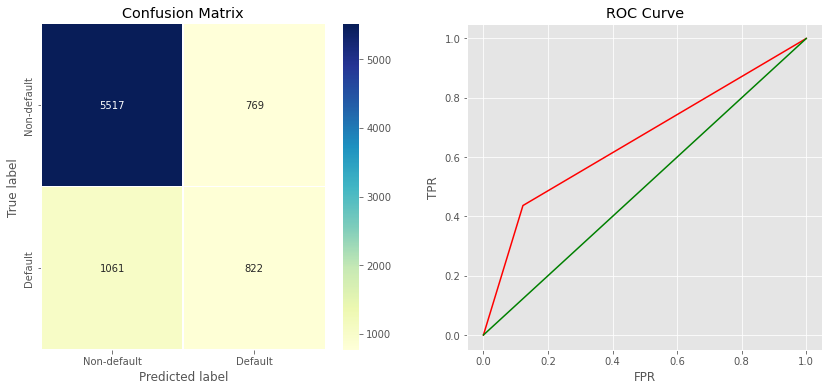

ROC_AUC Score : 0.6571010459308289


In [ ]:
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_annc_unb))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_annc_unb)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_annc_unb)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_annc_unb))

In [ ]:
#Définir le modèle keras :
ANN_model = Sequential()
ANN_model.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
ANN_model.add(Dense(units=40, activation='relu'))
ANN_model.add(Dense(units=30, activation='relu'))
ANN_model.add(Dense(units=20, activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid',))
#Compiler le modèle keras :
ANN_model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['acc',f1_m,precision_m, recall_m])
#Ajuster le modèle keras sur l'ensemble de données :
ANN_model.fit(x_rus,y_rus, epochs=100, batch_size=10)
#Faire des prédictions de classe avec le modèle ANN sur notre UnderSampling Balanced Data :
y_pred_annc_rus= ANN_model.predict(X_test)
y_pred_annc_rus = (y_pred_annc_rus > 0.5)

Epoch 1/100
870/870 [==============================] - 3s 2ms/step - loss: 0.6116 - acc: 0.6616 - f1_m: 0.6074 - precision_m: 0.7110 - recall_m: 0.5921
Epoch 2/100
870/870 [==============================] - 2s 2ms/step - loss: 0.5826 - acc: 0.6955 - f1_m: 0.6343 - precision_m: 0.7420 - recall_m: 0.5987
Epoch 3/100
870/870 [==============================] - 2s 2ms/step - loss: 0.5711 - acc: 0.7023 - f1_m: 0.6498 - precision_m: 0.7421 - recall_m: 0.6225
Epoch 4/100
870/870 [==============================] - 2s 2ms/step - loss: 0.5642 - acc: 0.7085 - f1_m: 0.6573 - precision_m: 0.7408 - recall_m: 0.6365
Epoch 5/100
870/870 [==============================] - 2s 2ms/step - loss: 0.5552 - acc: 0.7184 - f1_m: 0.6704 - precision_m: 0.7506 - recall_m: 0.6534
Epoch 6/100
870/870 [==============================] - 2s 2ms/step - loss: 0.5510 - acc: 0.7181 - f1_m: 0.6719 - precision_m: 0.7449 - recall_m: 0.6598
Epoch 7/100
870/870 [==============================] - 2s 2ms/step - loss: 0.5448 - acc:

              precision    recall  f1-score   support

           0       0.86      0.60      0.71      6286
           1       0.34      0.69      0.45      1883

    accuracy                           0.62      8169
   macro avg       0.60      0.64      0.58      8169
weighted avg       0.74      0.62      0.65      8169



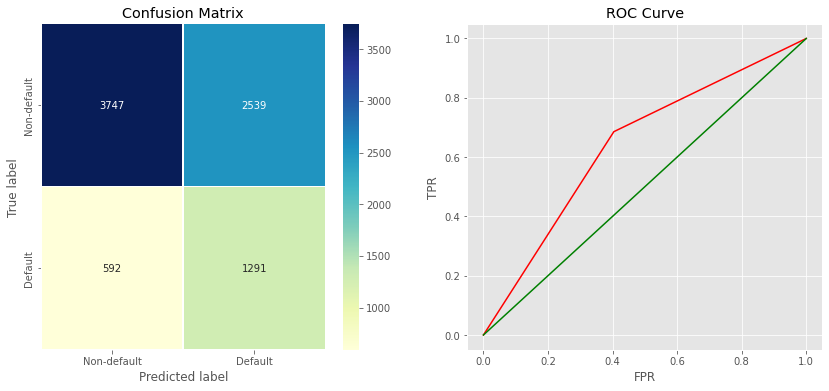

ROC_AUC Score : 0.6408473068730064


In [ ]:
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_annc_rus))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_annc_rus)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_annc_rus)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_annc_rus))

In [ ]:
#Définir le modèle keras :
ANN_model = Sequential()
ANN_model.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
ANN_model.add(Dense(units=40, activation='relu'))
ANN_model.add(Dense(units=30, activation='relu'))
ANN_model.add(Dense(units=20, activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid',))
#Compiler le modèle keras :
ANN_model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['acc',f1_m,precision_m, recall_m])
#Ajuster le modèle keras sur l'ensemble de données :
ANN_model.fit(x_smote,y_smote, epochs=100, batch_size=10)
#Faire des prédictions de classe avec le modèle ANN sur notre SMOTE Balanced Data :
y_pred_annc_smote= ANN_model.predict(X_test)
y_pred_annc_smote = (y_pred_annc_smote > 0.5)

Epoch 1/100
2943/2943 [==============================] - 8s 2ms/step - loss: 0.5807 - acc: 0.6919 - f1_m: 0.6309 - precision_m: 0.7337 - recall_m: 0.6011
Epoch 2/100
2943/2943 [==============================] - 9s 3ms/step - loss: 0.5571 - acc: 0.7065 - f1_m: 0.6576 - precision_m: 0.7374 - recall_m: 0.6403
Epoch 3/100
2943/2943 [==============================] - 11s 4ms/step - loss: 0.5455 - acc: 0.7154 - f1_m: 0.6745 - precision_m: 0.7351 - recall_m: 0.6690
Epoch 4/100
2943/2943 [==============================] - 10s 4ms/step - loss: 0.5367 - acc: 0.7226 - f1_m: 0.6905 - precision_m: 0.7345 - recall_m: 0.6980
Epoch 5/100
2943/2943 [==============================] - 10s 3ms/step - loss: 0.5264 - acc: 0.7315 - f1_m: 0.7039 - precision_m: 0.7408 - recall_m: 0.7134
Epoch 6/100
2943/2943 [==============================] - 11s 4ms/step - loss: 0.5181 - acc: 0.7364 - f1_m: 0.7094 - precision_m: 0.7425 - recall_m: 0.7249
Epoch 7/100
2943/2943 [==============================] - 11s 4ms/step - 

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6286
           1       0.43      0.57      0.49      1883

    accuracy                           0.72      8169
   macro avg       0.64      0.67      0.65      8169
weighted avg       0.76      0.72      0.74      8169



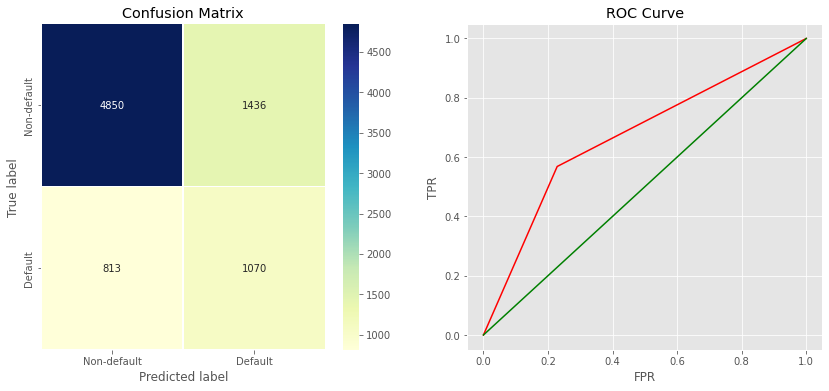

ROC_AUC Score : 0.6698990025630804


In [ ]:
#Appliquer la matrice de confusion et le ROC_Curve afin de montrer les performances d'un modèle de classification :
print(classification_report(y_test, y_pred_annc_smote))
f,ax =  plt.subplots(1,2,figsize=(14,6))
ConfMatrix = confusion_matrix(y_test, y_pred_annc_smote)
sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
xticklabels = ['Non-default', 'Default'], 
yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Confusion Matrix')
fpr,tpr,thresholds = roc_curve(y_test, y_pred_annc_smote)
ax[1].plot(fpr,tpr,color = 'r')
ax[1].plot(fpr,fpr,color = 'green')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title('ROC Curve')
plt.show()
print('ROC_AUC Score :',roc_auc_score(y_test, y_pred_annc_smote))

#### V. Evaluation
###### Vérifier le(s) modèle(s) ou les connaissances obtenues afin de s’assurer qu’ils répondent aux objectifs formulés au début du processus.


<font color = green> Interprétation : </font>

Nous passons maintenant à la partie Evaluation, où nous allons évaluer nos modèles.

Notre objectif est de réussir à prédire les clients qui ont tendance à faire un déficit, tout en minimisant au maximum les pertes que la banque pourrait subir à cause de ces clients. Donc pour remédier à cela nous avons décidé de nous concentrer sur la métrique recall pour évaluer nos modèles parmi les métriques f1-score et précision. 

Au cours de la classification et de la prédiction nous avons 4 résultats possibles : 

NB : Dans notre cas on a :

1 : Représente les clients déficitaire (Positive).

0 : Représente les clients non-déficitaire (Negative).

True Positives (TP) : L’individu 1 a été correctement prédit 1.

False Negatives (FN) : L’individu 1 n’a pas été correctement prédit.

False Positives (FP) : L’individu 0 n’a pas été correctement prédit.

True Negative (TN) : L’individu 0 à été correctement prédit 0.

La fonction Recall s'écrit comme suit :

Recall = True Positives / (True Positives + False Negatives)

En ce qui concerne les Faux Négatifs : ils représentent les clients qui ont tendance à à faire un déficit prédit en tant que clients non déficitaire, ce qu’on peut considérer comme étant un risque pour la banque, et donc suivant notre objectif nous allons nous focaliser sur ce score afin d'évaluer nos modèles. 

In [ ]:
#Création d'un tableau regroupant les différents résultats des modèles concernant le score ROC_AUC :
results_roc = pd.DataFrame(data=None, index=['KNN','SVM','ADD','AdaBoost','XGBoost','Random Forest','Logistic Regression','Gradient Boosting','Naive Bayes','Linear Discriminant Analysis','ANN'], columns=['Unbalanced','Random UnderSampling','SMOTE'], dtype=None, copy=None)

In [ ]:
results_roc.loc['ANN']=[roc_auc_score(y_test, y_pred_annc_unb),roc_auc_score(y_test, y_pred_annc_rus),roc_auc_score(y_test, y_pred_annc_smote)]
results_roc.loc['KNN']=[roc_auc_score(y_test, y_pred_knn_unb),roc_auc_score(y_test, y_pred_knn_rus),roc_auc_score(y_test, y_pred_knn_smote)]
results_roc.loc['SVM']=[roc_auc_score(y_test, y_pred_svm_unb),roc_auc_score(y_test, y_pred_svm_rus),roc_auc_score(y_test, y_pred_svm_smote)]
results_roc.loc['ADD']=[roc_auc_score(y_test, y_pred_dct_unb),roc_auc_score(y_test, y_pred_dct_rus),roc_auc_score(y_test, y_pred_dct_smote)]
results_roc.loc['AdaBoost']=[roc_auc_score(y_test, y_pred_adac_unb),roc_auc_score(y_test, y_pred_adac_rus),roc_auc_score(y_test, y_pred_adac_smote)]
results_roc.loc['XGBoost']=[roc_auc_score(y_test, y_pred_xgbc_unb),roc_auc_score(y_test, y_pred_xgbc_rus),roc_auc_score(y_test, y_pred_xgbc_smote)]
results_roc.loc['Random Forest']=[roc_auc_score(y_test, y_pred_clfc_unb),roc_auc_score(y_test, y_pred_clfc_rus),roc_auc_score(y_test, y_pred_clfc_smote)]
results_roc.loc['Logistic Regression']=[roc_auc_score(y_test, y_pred_logregc_unb),roc_auc_score(y_test, y_pred_logregc_rus),roc_auc_score(y_test, y_pred_logregc_smote)]
results_roc.loc['Gradient Boosting']=[roc_auc_score(y_test, y_pred_gradbc_unb),roc_auc_score(y_test, y_pred_gradbc_rus),roc_auc_score(y_test, y_pred_gradbc_smote)]
results_roc.loc['Naive Bayes']=[roc_auc_score(y_test, y_pred_NV_unb),roc_auc_score(y_test, y_pred_NV_rus),roc_auc_score(y_test, y_pred_NV_smote)]
results_roc.loc['Linear Discriminant Analysis']=[roc_auc_score(y_test, y_pred_ldac_unb),roc_auc_score(y_test, y_pred_ldac_rus),roc_auc_score(y_test, y_pred_ldac_smote)]
results_roc

,Unbalanced,Random UnderSampling,SMOTE
KNN,0.629825,0.684971,0.615234
SVM,0.649072,0.712688,0.710667
ADD,0.648706,0.701363,0.685649
AdaBoost,0.649664,0.707156,0.693912
XGBoost,0.663051,0.704607,0.676882
Random Forest,0.666695,0.701021,0.682977
Logistic Regression,0.608681,0.678701,0.67629
Gradient Boosting,0.65664,0.688149,0.671597
Naive Bayes,0.646854,0.616867,0.602928
Linear Discriminant Analysis,0.619226,0.681774,0.678859


In [ ]:
#Création d'un tableau regroupant les différents résultats des modèles concernant le recall score :
results_recall = pd.DataFrame(data=None, index=['KNN','SVM','ADD','AdaBoost','XGBoost','Random Forest','Logistic Regression','Gradient Boosting','Naive Bayes','Linear Discriminant Analysis','ANN'], columns=['Unbalanced','Random UnderSampling','SMOTE'], dtype=None, copy=None)

In [ ]:
results_recall.loc['ANN']=[recall_score(y_test, y_pred_annc_unb),recall_score(y_test, y_pred_annc_rus),recall_score(y_test, y_pred_annc_smote)]
results_recall.loc['SVM']=[recall_score(y_test, y_pred_svm_unb),recall_score(y_test, y_pred_svm_rus),recall_score(y_test, y_pred_svm_smote)]
results_recall.loc['KNN']=[recall_score(y_test, y_pred_knn_unb),recall_score(y_test, y_pred_knn_rus),recall_score(y_test, y_pred_knn_smote)]
results_recall.loc['ADD']=[recall_score(y_test, y_pred_dct_unb),recall_score(y_test, y_pred_dct_rus),recall_score(y_test, y_pred_dct_smote)]
results_recall.loc['AdaBoost']=[recall_score(y_test, y_pred_adac_unb),recall_score(y_test, y_pred_adac_rus),recall_score(y_test, y_pred_adac_smote)]
results_recall.loc['XGBoost']=[recall_score(y_test, y_pred_xgbc_unb),recall_score(y_test, y_pred_xgbc_rus),recall_score(y_test, y_pred_xgbc_smote)]
results_recall.loc['Random Forest']=[recall_score(y_test, y_pred_clfc_unb),recall_score(y_test, y_pred_clfc_rus),recall_score(y_test, y_pred_clfc_smote)]
results_recall.loc['Logistic Regression']=[recall_score(y_test, y_pred_logregc_unb),recall_score(y_test, y_pred_logregc_rus),recall_score(y_test, y_pred_logregc_smote)]
results_recall.loc['Gradient Boosting']=[recall_score(y_test, y_pred_gradbc_unb),recall_score(y_test, y_pred_gradbc_rus),recall_score(y_test, y_pred_gradbc_smote)]
results_recall.loc['Naive Bayes']=[recall_score(y_test, y_pred_NV_unb),recall_score(y_test, y_pred_NV_rus),recall_score(y_test, y_pred_NV_smote)]
results_recall.loc['Linear Discriminant Analysis']=[recall_score(y_test, y_pred_ldac_unb),recall_score(y_test, y_pred_ldac_rus),recall_score(y_test, y_pred_ldac_smote)]
results_recall

,Unbalanced,Random UnderSampling,SMOTE
KNN,0.30324,0.548593,0.470526
SVM,0.336166,0.597982,0.589485
ADD,0.34307,0.628784,0.49761
AdaBoost,0.347849,0.645778,0.520977
XGBoost,0.379713,0.677111,0.439193
Random Forest,0.395114,0.667552,0.469995
Logistic Regression,0.250133,0.674456,0.677111
Gradient Boosting,0.386617,0.68667,0.427509
Naive Bayes,0.74137,0.848115,0.858736
Linear Discriminant Analysis,0.276155,0.670738,0.672862


<font color = green> Conclusion : </font>

Suivant cette méthode d’évaluation par la focalisation sur la métrique recall, le modèle Naive Bayes en utilisant le SMOTE Sampling a un score de recall pour les classes (1) égal à 0.86. Donc ce modèle peut être notre candidat optimale.
 
En revanche, en jugeant les autres métriques du rapport, nous constatons que le Bayes a un score de 0.47 concernant le f1_score qui est la métrique qui nous permet de juger la qualité globale de notre modèle. 

Même si le modèle Bayes est efficace à minimiser les Faux Négatifs, il pourrait néanmoins mettre à risque la réputation de la banque puisque il rejettera à plusieurs fois des demandes de crédits même si le client n’est pas déficitaire. Par contre, si la banque veut à tout prix de ne pas perdre de l’argent et s’assurer de l’authenticité des clients non déficitaires, le Naive Bayes est le modèle adéquat, mais nous n’allons pas le choisir.

Nous avons donc cherché d’autre méthodes d'évaluation qui pourront nous aider à choisir le meilleur modèle, pour cela nous avons opté pour la méthode d’évaluation ROC, en calculant le score et en étudiant la courbe des modèles suivant ce format.


In [ ]:
from sklearn.metrics import roc_curve, auc

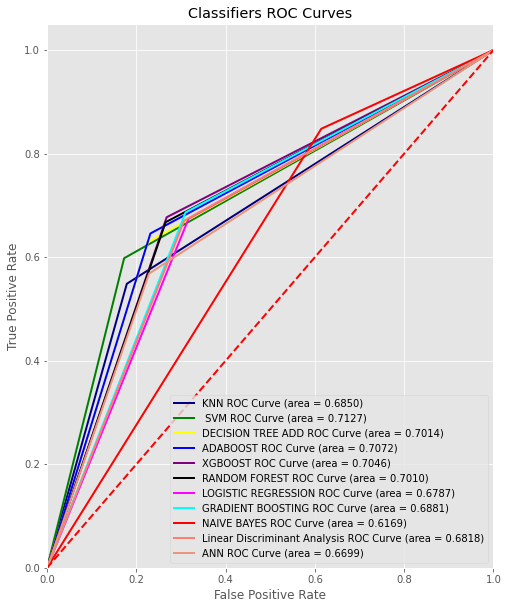

In [ ]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_knn_rus) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svm_rus) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_dct_rus)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold3 = roc_curve(y_test,y_pred_adac_rus)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold3 = roc_curve(y_test, y_pred_xgbc_rus)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold3 = roc_curve(y_test, y_pred_clfc_rus)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold3 = roc_curve(y_test, y_pred_logregc_rus)
roc_auc7 = auc(fpr7, tpr7)
fpr8, tpr8, threshold3 = roc_curve(y_test, y_pred_gradbc_rus)
roc_auc8 = auc(fpr8, tpr8)
fpr9, tpr9, threshold3 = roc_curve(y_test, y_pred_NV_rus)
roc_auc9 = auc(fpr9, tpr9)
fpr10, tpr10, threshold3 = roc_curve(y_test, y_pred_ldac_rus)
roc_auc10 = auc(fpr10, tpr10)
fpr11, tpr11, threshold3 = roc_curve(y_test, y_pred_annc_smote)
roc_auc11 = auc(fpr11, tpr11)
plt.figure(figsize=(8,10)) 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='KNN ROC Curve (area = %0.4f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label=' SVM ROC Curve (area = %0.4f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='DECISION TREE ADD ROC Curve (area = %0.4f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='BLUE', lw=2, label='ADABOOST ROC Curve (area = %0.4f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='purple', lw=2, label='XGBOOST ROC Curve (area = %0.4f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='RANDOM FOREST ROC Curve (area = %0.4f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='magenta', lw=2, label='LOGISTIC REGRESSION ROC Curve (area = %0.4f)'% roc_auc7)
plt.plot(fpr8, tpr8, color='cyan', lw=2, label='GRADIENT BOOSTING ROC Curve (area = %0.4f)'% roc_auc8)
plt.plot(fpr9, tpr9, color='red', lw=2, label='NAIVE BAYES ROC Curve (area = %0.4f)'% roc_auc9)
plt.plot(fpr10, tpr10, color='SALMON', lw=2, label='Linear Discriminant Analysis ROC Curve (area = %0.4f)'% roc_auc10)
plt.plot(fpr11, tpr11, color='DARKSALMON', lw=2, label='ANN ROC Curve (area = %0.4f)'% roc_auc11)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC Curves') 
plt.legend(loc = "lower right")
plt.show()

<font color = green>Conclusion : </font>

La courbe ROC montre le compromis entre la sensibilité ou TPR et la spécificité ou 1 – FPR. 

Les classificateurs qui donnent des courbes plus proches du coin supérieur gauche indiquent une meilleure performance. Comme référence, un classificateur aléatoire devrait donner des points situés le long de la diagonale FPR = TPR.

Le score AUC_ROC nous aidera à évaluer le meilleur modèle. 

NB : AUC = Area Under Curve.

On a choisi le meilleur AUC_ROC score entre les 3 différents Datasets UnderSampled, Unbalanced et SMOTE Balanced pour chaque modèle et on a procédé à la visualisation de leurs valeurs.

Après avoir étudié ce graphe nous avons réalisé que le modèle SVM pour le UnderSampling a le score le plus élevé concernant le AUC_ROC score, avec un score de 0.71. 

Donc, en focalisant sur la métrique ROC, nous avons choisi le modèle SVM comme étant le plus performant d’entre eux avec un score de recall aussi respectable, il satisfera parfaitement les attentes de la banque.